<div style="text-align: center;">
    <img src="images/Marca Leandra Jaramillo.png" alt="Logo personal" style="width:25%;">
</div>

# **Proyecto Final_Ciencia de Datos II:**
## **Diseño de un algoritmo de clasificación para atención de casos de víctimas de violencia**

## **Problema de Investigación**

_¿Puede un algoritmo de aprendizaje automático clasificar el **índice de vulnerabilidad** de una víctima de violencia de género, permitiendo así priorizar las atenciones, focalizar recursos y visibilizar la complejidad de esta problemática social?_

## **Objetivos del Proyecto**
_Este proyecto de ciencia de datos busca:_

* Identificar las principales tendencias en los casos de violencia reportados, a través de la línea 144,  entre los años 2020 y 2023.

* Definir y documentar un índice de vulnerabilidad en casos de violencia utilizando técnicas de ciencia de datos.

* Desarrollar un modelo de machine learning que ayude en la priorización de los casos, según niveles de vulnerabilidad, como una herramienta que oriente la intervención profesional y la toma de decisiones institucionales


## **Descripción del Conjunto de Datos**

El conjunto de datos recopila información de la página https://datos.gob.ar/  y se ha enriquecido con la cantidad de población de cada provincia según los resultados del último censo realizado en 2022. El dataset fue obtenido a través de Kaggle.

## **Primera parte: Exploración inicial, limpieza y transformación de los datos**

En esta sección del proyecto se importan las librerías y herramientas necesarias para el desarrollo del análisis. Se procede a cargar el dataset y realizar una exploración inicial para comprender las características principales de los datos, identificar posibles valores nulos o inconsistencias, y realizar las transformaciones necesarias, unificación de categorias y codificaciones necesarias a través de Label encoding para para variables de tipo binario y one hot encoding (OHE) para las variables con más de dos categprías; de esta manera se garantiza que los datos estén en óptimas condiciones para el modelado posterior.

In [1]:
# Importar las herramientas y librerías necesarias
import pandas as pd
import numpy as np

# Limpieza y transformación de los datos 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo

# Algorítmos
from scipy.stats import norm
from scipy import stats

# Control de advertencias 
import warnings

In [2]:
##Importo el DataSet: 
df_144 = pd.read_csv("144.csv", sep=",", header=0, encoding="latin1")

### **Descripción de los datos originales**

* **Exploración inicial del Dataset:**

In [3]:
## N°dimensiones del Data Frame
df_144.shape

(89540, 21)

In [4]:
#Columnas que contiene el Data Set
df_144.columns

Index(['Año', 'Fecha', 'prov_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'poblacion_provincia'],
      dtype='object')

In [5]:
#Visualización primeras 5 filas del dataset
df_144.head()

,Año,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,No,No,No,Otro,Varon,17569053
2,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
3,2023,1/1/2023,Entre Ríos,Mujer,28.0,NaN,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,1426426
4,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533


In [6]:
# Información general del Dataset
print(df_144.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89540 entries, 0 to 89539
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Año                                                89540 non-null  int64  
 1   Fecha                                              89540 non-null  object 
 2   prov_persona_en_situacion_violencia                89540 non-null  object 
 3   genero_persona_en_situacion_de_violencia           87636 non-null  object 
 4   edad_persona_en_situacion_de_violencia             72262 non-null  float64
 5   pais_nacimiento_persona_en_situacion_de_violencia  59259 non-null  object 
 6   tipo_de_violencia_fisica                           89540 non-null  object 
 7   tipo_de_violencia_psicologica                      89540 non-null  object 
 8   tipo_de_violencia_sexual                           89540 non-null  object 
 9   tipo_d

* **Conversión de la columna fecha a formato datatime:**

In [7]:
# Convertir la columna de fecha en formato datetime
df_144['Fecha'] = pd.to_datetime(df_144['Fecha'], errors='coerce')

# Extraer el año, mes y día como números
df_144['año'] = df_144['Fecha'].dt.year
df_144['mes'] = df_144['Fecha'].dt.month
df_144['dia'] = df_144['Fecha'].dt.day

* **Limpieza y estandarización columnas:**

In [8]:
#Limpieza y estandarización nombres de las columnas usamdo expresiones regulares
import collections
import re

def clean_column_names(columns):
    # Definir una función de limpieza usando expresiones regulares
    def clean_name(name):
        name = name.strip().lower()  # Quitar espacios y convertir a minúsculas
        name = re.sub(r'[()\s]+', '_', name)  # Reemplazar espacios y paréntesis con guiones bajos
        return name

    # Aplicar la limpieza a todos los nombres de las columnas
    cleaned_columns = columns.map(clean_name).tolist()

    # Verificar duplicados después de la limpieza
    counts = collections.Counter(cleaned_columns)
    duplicates = {item for item, count in counts.items() if count > 1}

    if duplicates:
        for dup in duplicates:
            indices = [i for i, x in enumerate(cleaned_columns) if x == dup]
            for idx, i in enumerate(indices):
                cleaned_columns[i] = f"{cleaned_columns[i]}_{idx + 1}"

    return cleaned_columns

# Asignar los nombres de columnas limpios al DataFrame
df_144.columns = clean_column_names(df_144.columns)

# Verificar los nombres de columnas después de la limpieza
print("Nombres de columnas después de la limpieza:")
print(df_144.columns)

Nombres de columnas después de la limpieza:
Index(['año_1', 'fecha', 'prov_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'poblacion_provincia', 'año_2', 'mes',
       'dia'],
      dtype='object')


In [9]:
# Eliminar las columnas 'fecha' y 'año_2', y luego renombrar la columna 'año_1' a 'año' si no existe ya una columna 'año'
df_144 = df_144.drop(columns=['fecha', 'año_2'])

# Verificar y renombrar la columna 'año_1' si no existe ya una columna llamada 'año'
if 'año' not in df_144.columns:
    df_144 = df_144.rename(columns={'año_1': 'año'})
else:
    print("Ya existe una columna con el nombre 'año'. No se realizó el cambio.")

# Imprimir los nombres de columnas después de los cambios
print("Nombres de columnas después de los cambios:")
print(df_144.columns)

Nombres de columnas después de los cambios:
Index(['año', 'prov_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'poblacion_provincia', 'mes', 'dia'],
      dtype='object')


* **Identificación de variables numéricas y categóricas:**

In [10]:
# Identificar variables numéricas
numerical_columns = df_144.select_dtypes(include=['number']).columns.tolist()
num_numerical_columns = len(numerical_columns)

# Identificar variables categóricas
categorical_columns = df_144.select_dtypes(include=['object']).columns.tolist()
num_categorical_columns = len(categorical_columns)

# Imprimir resultados
print(f"Columnas numéricas ({num_numerical_columns}): {numerical_columns}")
print(f"Columnas categóricas ({num_categorical_columns}): {categorical_columns}")

Columnas numéricas (4): ['año', 'edad_persona_en_situacion_de_violencia', 'mes', 'dia']
Columnas categóricas (18): ['prov_persona_en_situacion_violencia', 'genero_persona_en_situacion_de_violencia', 'pais_nacimiento_persona_en_situacion_de_violencia', 'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica', 'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral', 'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora', 'genero_de_la_persona_agresora', 'poblacion_provincia']


### **Manejo de valores faltantes**

In [11]:
#Total de valores nulos en cada columna
print(df_144.isnull().sum())

año                                                      0
prov_persona_en_situacion_violencia                      0
genero_persona_en_situacion_de_violencia              1904
edad_persona_en_situacion_de_violencia               17278
pais_nacimiento_persona_en_situacion_de_violencia    30281
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                         0
modalidad_de_violencia_otras                            

* **Tratamiento de valores nulos**

1. Columnas: **_Género de la persona en situación de violencia_** y **_Género de la persona agresora_**: Se ha decidido imputar los valores nulos en estas columnas con la categoría **"Desconocido"** justificado en: 

**Neutralidad en el Tratamiento de Datos:** Asignar "Desconocido" permite mantener la neutralidad sin imponer categorizaciones que comprometan la integridad del análisis. Esto refleja mejor la incertidumbre sin introducir un sesgo artificial.

**Equidad y No Discriminación:** Este enfoque asegura un análisis más justo, evitando decisiones que perpetúen desigualdades y respetando los principios de fairness en contextos sensibles como la violencia de género.

In [12]:
# Lista de columnas a imputar con la categoría "Desconocido"
columns_to_impute = [
    'genero_persona_en_situacion_de_violencia',
    'genero_de_la_persona_agresora'
]

# Imputación de valores nulos con "Desconocido"
for col in columns_to_impute:
    df_144[col] = df_144[col].fillna('Desconocido')  # Rellenar valores nulos con "Desconocido"

# Verificar el resultado
print(df_144[columns_to_impute].isnull().sum())  # Mostrar la cantidad de valores nulos restantes en estas columnas

genero_persona_en_situacion_de_violencia    0
genero_de_la_persona_agresora               0
dtype: int64


2. Columna: **_Edad persona en situación de violencia:_** Se ha decidido **eliminar las filas** debido a la importancia de esta variable en el modelo predictivo. Dado que la edad es un factor clave en la determinación del índice de vulnerabilidad, imputar o asignar valores a estos datos faltantes podría introducir sesgos o distorsionar el análisis. También se eliminan las filas donde la edad es mayor a 100 años. 

In [13]:
# Eliminar filas con valores nulos en la columna 'edad_persona_en_situacion_de_violencia'
df_144.dropna(subset=['edad_persona_en_situacion_de_violencia'], inplace=True)

# Eliminar filas donde la edad es mayor a 100 años
df_144 = df_144[df_144['edad_persona_en_situacion_de_violencia'] <= 100]

# Verificar los cambios
print(df_144['edad_persona_en_situacion_de_violencia'].describe())

count    72260.000000
mean        35.685884
std         12.590119
min          1.000000
25%         27.000000
50%         34.000000
75%         42.000000
max        100.000000
Name: edad_persona_en_situacion_de_violencia, dtype: float64


3. Columna: **_pais_nacimiento_persona_en_situacion_de_violencia:_** Se ha decidido imputar con la categpría **desconocido**, esta decisión la justifico en: 

**Alta Proporción de Valores Nulos:** la variables tiene una gran cantidad de datos faltantes, 30281 datos exactamente, imputar con 'DESCONOCIDO' es una opción que se ajusta a la realizad porque refleja la falta de información sin hacer suposiciones que podrían introducir sesgos. La ausencia de este dato es una realidad de cierta manera "esperada" ya que los reportes que recibe la línea 144 no son realizados únicamente de manera directa por la víctima, sino por quien pueda ser testigo del hecho. 

**Poco impacto de la variable en el modelo:** Por ser una variable sensible no será considerada en el modelo, con ello se evita distorsionar otros patrones en los datos que puedan influir de manera sesgada en el análisis.

**Transparencia y Simplicidad:** La imputación con 'DESCONOCIDO' es una forma directa de manejar la falta de información, lo que facilita la interpretación y transparencia en el análisis.

In [14]:
# Asignar "Desconocido" a los valores nulos en la columna 'pais_nacimiento_persona_en_situacion_de_violencia'
df_144['pais_nacimiento_persona_en_situacion_de_violencia'] = df_144['pais_nacimiento_persona_en_situacion_de_violencia'].fillna('Desconocido')

# Verificar el resultado
print(df_144['pais_nacimiento_persona_en_situacion_de_violencia'].isnull().sum())

0


4. Columna: **_vinculo_con_la_persona_agresora:_** En la exploración inicial esta columna tenía 3395 valores nulos, después de la eliminación de los valores nulos de la columna edad, han quedado 1.622 datos nulos de esta columna que representan el 2.24%, dado este porcentaje y la importancia de esta variable en el modelo se toma la decisión de eliminar los nulos sin afectar significativamente el tamaño o la calidad del dataset. 

In [15]:
#Verificar los cantidad de nulos que quedan en la columna
print(df_144['vinculo_con_la_persona_agresora'].isnull().sum())

1622


In [16]:
# Eliminar filas con valores nulos en la columna 'vinculo_con_la_persona_agresora'
df_144.dropna(subset=['vinculo_con_la_persona_agresora'], inplace=True)

# Verificar el resultado
print(df_144['vinculo_con_la_persona_agresora'].isnull().sum())

0


5. Columna: **_poblacion_provincia:_** Se han imputado los valores nulos en esta columna utilizando la mediana. Esta decisión se justifica porque la mediana permite mantener una distribución central de los datos sin introducir sesgos significativos hacia valores extremos, lo cual es particularmente útil en variables numéricas con posibles outliers.

El procedimiento aplicado fue el siguiente:

1. Conversión a Números: Los datos de la columna fueron convertidos a valores numéricos, manejando cualquier dato no numérico convirtiéndolo a NaN.

2. Cálculo de la Mediana: Se calculó la mediana de los valores existentes en la columna, ignorando los NaN.

3. Imputación de Valores Nulos: Los valores nulos fueron reemplazados por la mediana calculada, asegurando que la columna permanezca en formato numérico. 

In [17]:
# Convertir los datos a números y manejar errores, convirtiendo datos no numéricos a NaN
df_144['poblacion_provincia'] = pd.to_numeric(df_144['poblacion_provincia'], errors='coerce')

# Calcular la mediana de la columna 'poblacion_provincia' ignorando los NaN
median_population = df_144['poblacion_provincia'].median()

# Imputar valores nulos con la mediana y asegurar la conversión a float
df_144['poblacion_provincia'] = df_144['poblacion_provincia'].fillna(median_population).astype(float)

# Verificar el resultado
print(df_144['poblacion_provincia'].isnull().sum())
print(df_144['poblacion_provincia'].dtype)

0
float64


* **Validación del Proceso de Imputación y Manejo de Valores Nulos:**

In [18]:
#Verificar los nulos nuevamente para confirmar el proceso
print(df_144.isnull().sum())

año                                                  0
prov_persona_en_situacion_violencia                  0
genero_persona_en_situacion_de_violencia             0
edad_persona_en_situacion_de_violencia               0
pais_nacimiento_persona_en_situacion_de_violencia    0
tipo_de_violencia_fisica                             0
tipo_de_violencia_psicologica                        0
tipo_de_violencia_sexual                             0
tipo_de_violencia_economica_y_patrimonial            0
tipo_de_violencia_simbolica                          0
tipo_de_violencia_domestica                          0
modalidad_de_violencia_institucional                 0
modalidad_de_violencia_laboral                       0
modalidad_violencia_contra_libertad_reproductiva     0
modalidad_de_violencia_obstetrica                    0
modalidad_de_violencia_mediatica                     0
modalidad_de_violencia_otras                         0
vinculo_con_la_persona_agresora                      0
genero_de_

## **Codificación de variables categóricas**

* **Verificación de variables antes del proceso de codificación:**

In [19]:
# Identificar variables categóricas
categorical_columns = df_144.select_dtypes(include=['object']).columns.tolist()
num_categorical_columns = len(categorical_columns)

# Imprimir resultados
print(f"Columnas categóricas ({num_categorical_columns}): {categorical_columns}")

Columnas categóricas (17): ['prov_persona_en_situacion_violencia', 'genero_persona_en_situacion_de_violencia', 'pais_nacimiento_persona_en_situacion_de_violencia', 'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica', 'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral', 'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora', 'genero_de_la_persona_agresora']


* **Verificación de número de categorías por variable:**

In [20]:
#Verificar cuantas categorias tiene cada variable categórica del dataset

# Lista de variables categóricas
categorical_variables = ['prov_persona_en_situacion_violencia', 'genero_persona_en_situacion_de_violencia', 'pais_nacimiento_persona_en_situacion_de_violencia', 'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica', 'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral', 'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras', 'genero_de_la_persona_agresora', 'vinculo_con_la_persona_agresora']

# Contar el número de categorías para cada variable categórica
for variable in categorical_variables:
    num_categories = df_144[variable].nunique()
    print(f'La variable {variable} tiene {num_categories} categorías.')

La variable prov_persona_en_situacion_violencia tiene 27 categorías.
La variable genero_persona_en_situacion_de_violencia tiene 12 categorías.
La variable pais_nacimiento_persona_en_situacion_de_violencia tiene 45 categorías.
La variable tipo_de_violencia_fisica tiene 2 categorías.
La variable tipo_de_violencia_psicologica tiene 2 categorías.
La variable tipo_de_violencia_sexual tiene 3 categorías.
La variable tipo_de_violencia_economica_y_patrimonial tiene 2 categorías.
La variable tipo_de_violencia_simbolica tiene 3 categorías.
La variable tipo_de_violencia_domestica tiene 2 categorías.
La variable modalidad_de_violencia_institucional tiene 3 categorías.
La variable modalidad_de_violencia_laboral tiene 3 categorías.
La variable modalidad_violencia_contra_libertad_reproductiva tiene 3 categorías.
La variable modalidad_de_violencia_obstetrica tiene 3 categorías.
La variable modalidad_de_violencia_mediatica tiene 2 categorías.
La variable modalidad_de_violencia_otras tiene 2 categorías.

* **Verificación de algunas categorias donde aparecen más de las esperadas:**

In [21]:
# Lista de las variables a verificar
variables = [
    'tipo_de_violencia_sexual', 
    'tipo_de_violencia_simbolica', 
    'modalidad_de_violencia_institucional', 
    'modalidad_de_violencia_laboral', 
    'modalidad_violencia_contra_libertad_reproductiva', 
    'modalidad_de_violencia_obstetrica'
]

# Verificar las categorías únicas para cada variable
for variable in variables:
    print(f"Categorías en la variable '{variable}':")
    print(df_144[variable].unique())
    print("\n")

Categorías en la variable 'tipo_de_violencia_sexual':
['Si' 'No' 'SI']


Categorías en la variable 'tipo_de_violencia_simbolica':
['No' 'Si' 'SI']


Categorías en la variable 'modalidad_de_violencia_institucional':
['No' 'Si' 'SI']


Categorías en la variable 'modalidad_de_violencia_laboral':
['No' 'Si' 'SI']


Categorías en la variable 'modalidad_violencia_contra_libertad_reproductiva':
['No' 'Si' 'SI']


Categorías en la variable 'modalidad_de_violencia_obstetrica':
['No' 'Si' 'SI']




* **Unificación de categorias duplicadas:**

In [22]:
# Lista de las variables que necesitan unificación de categorías
variables = [
    'tipo_de_violencia_sexual', 
    'tipo_de_violencia_simbolica', 
    'modalidad_de_violencia_institucional', 
    'modalidad_de_violencia_laboral', 
    'modalidad_violencia_contra_libertad_reproductiva', 
    'modalidad_de_violencia_obstetrica'
]

# Unificar las categorías 'Si' y 'SI' en una sola y que estén el mismo formato
for variable in variables:
    df_144[variable] = df_144[variable].str.strip().str.capitalize()

# Verificar el resultado
for variable in variables:
    print(f"Categorías unificadas en la variable '{variable}':")
    print(df_144[variable].unique())
    print("\n")

Categorías unificadas en la variable 'tipo_de_violencia_sexual':
['Si' 'No']


Categorías unificadas en la variable 'tipo_de_violencia_simbolica':
['No' 'Si']


Categorías unificadas en la variable 'modalidad_de_violencia_institucional':
['No' 'Si']


Categorías unificadas en la variable 'modalidad_de_violencia_laboral':
['No' 'Si']


Categorías unificadas en la variable 'modalidad_violencia_contra_libertad_reproductiva':
['No' 'Si']


Categorías unificadas en la variable 'modalidad_de_violencia_obstetrica':
['No' 'Si']




### **Codificación con Label Encoding variables categóricas de tipo binario:** 

In [23]:
# Lista de columnas con dos opciones de respuesta que se necesita codificar
binary_columns = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional',
    'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva',
    'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica',
    'modalidad_de_violencia_otras'
]

# Verificación de valores únicos antes del mapeo
for col in binary_columns:
    # Estandarizar a minúsculas y mapear respuestas a "sí"/"no"
    df_144[col] = df_144[col].astype(str).str.lower()
    df_144[col] = df_144[col].replace({'true': 'sí', 'false': 'no'})
    
    # Verificar los valores únicos de la columna
    print(f"Valores únicos en la columna {col}: {df_144[col].unique()}")

Valores únicos en la columna tipo_de_violencia_fisica: ['si' 'no']
Valores únicos en la columna tipo_de_violencia_psicologica: ['si' 'no']
Valores únicos en la columna tipo_de_violencia_sexual: ['si' 'no']
Valores únicos en la columna tipo_de_violencia_economica_y_patrimonial: ['no' 'si']
Valores únicos en la columna tipo_de_violencia_simbolica: ['no' 'si']
Valores únicos en la columna tipo_de_violencia_domestica: ['no' 'si']
Valores únicos en la columna modalidad_de_violencia_institucional: ['no' 'si']
Valores únicos en la columna modalidad_de_violencia_laboral: ['no' 'si']
Valores únicos en la columna modalidad_violencia_contra_libertad_reproductiva: ['no' 'si']
Valores únicos en la columna modalidad_de_violencia_obstetrica: ['no' 'si']
Valores únicos en la columna modalidad_de_violencia_mediatica: ['no' 'si']
Valores únicos en la columna modalidad_de_violencia_otras: ['no' 'si']


* **Verificación de la Codificación Binaria: 0='No', 1='Si'**

In [24]:
# Crear un diccionario para almacenar las etiquetas y sus valores asignados
label_encoding_dict = {}

# Lista de columnas con dos opciones de respuesta 
binary_columns = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional',
    'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva',
    'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica',
    'modalidad_de_violencia_otras'
]

# Codificación y creación del diccionario de etiquetas
for col in binary_columns:
    # Estandarizar a minúsculas y mapear respuestas a "sí"/"no"
    df_144[col] = df_144[col].astype(str).str.lower()
    df_144[col] = df_144[col].replace({'true': 'sí', 'false': 'no'})
    
    # Unificar los valores antes de mapear
    df_144[col] = df_144[col].replace({'si': 'sí', 'ausencia': 'no'})
    
    # Crear el diccionario de codificación
    col_dict = {'no': 0, 'sí': 1}
    
    # Guardar el diccionario de la columna actual en el diccionario principal
    label_encoding_dict[col] = col_dict
    
    # Reemplazar los valores en la columna con sus correspondientes índices
    df_144[col] = df_144[col].map(col_dict)
    
    # Rellenar los valores nulos con un valor predeterminado (0 en este caso)
    df_144[col] = df_144[col].fillna(0).astype(int)

# Mostrar el DataFrame actualizado y el diccionario de etiquetas
print(label_encoding_dict)

{'tipo_de_violencia_fisica': {'no': 0, 'sí': 1}, 'tipo_de_violencia_psicologica': {'no': 0, 'sí': 1}, 'tipo_de_violencia_sexual': {'no': 0, 'sí': 1}, 'tipo_de_violencia_economica_y_patrimonial': {'no': 0, 'sí': 1}, 'tipo_de_violencia_simbolica': {'no': 0, 'sí': 1}, 'tipo_de_violencia_domestica': {'no': 0, 'sí': 1}, 'modalidad_de_violencia_institucional': {'no': 0, 'sí': 1}, 'modalidad_de_violencia_laboral': {'no': 0, 'sí': 1}, 'modalidad_violencia_contra_libertad_reproductiva': {'no': 0, 'sí': 1}, 'modalidad_de_violencia_obstetrica': {'no': 0, 'sí': 1}, 'modalidad_de_violencia_mediatica': {'no': 0, 'sí': 1}, 'modalidad_de_violencia_otras': {'no': 0, 'sí': 1}}


### **Codificación con OHE variables con múltiples categorias**

* **Normalización y codificación variable: pais_nacimiento_persona_en_situacion_de_violencia**

In [25]:
import re

# Función para verificar valores nulos en un checkpoint
def verificar_nulos(df, checkpoint):
    print(f"\nCheckpoint {checkpoint}:")
    print(df.isnull().sum())
    print("\n")

# Función para normalizar texto y realizar consolidaciones específicas usando expresiones regulares
def normalize_text(text):
    # Normalización de acentos y caracteres especiales
    text = text.lower()
    text = re.sub(r'[áàäâ]', 'a', text)
    text = re.sub(r'[éèëê]', 'e', text)
    text = re.sub(r'[íìïî]', 'i', text)
    text = re.sub(r'[óòöô]', 'o', text)
    text = re.sub(r'[úùüû]', 'u', text)
    text = re.sub(r'ñ', 'n', text)
    return text

# Diccionario de reemplazos específicos por columna con consolidación
replacements_dict = {
    'pais_nacimiento_persona_en_situacion_de_violencia': {
        'espaã±ola': 'espanola',  # Corregir encoding incorrecto
        'otra': 'otro',  # Consolidar 'otra' y 'otro' en 'otro'
        'brasilena': 'brasilena',  # Mantener 'brasilena'
        'espanola': 'espanola'  # Mantener 'espanola'
    }
}

# Función para aplicar reemplazos específicos y normalización a múltiples columnas
def normalize_and_replace(df_144, replacements_dict):
    for column, replacements in replacements_dict.items():
        # Primero aplicar la normalización de texto
        df_144[column] = df_144[column].apply(normalize_text)
        # Verificar nulos después de la normalización
        verificar_nulos(df_144, f"Después de normalizar {column}")
        
        # Luego, aplicar los reemplazos específicos según el diccionario
        df_144[column] = df_144[column].replace(replacements)
        
        # Verificar nulos después de los reemplazos
        verificar_nulos(df_144, f"Después de reemplazar en {column}")
    return df_144

# Función para verificar los cambios en las columnas
def verificar_cambios(df, columnas):
    for columna in columnas:
        print(f"Valores únicos en '{columna}':")
        print(df[columna].unique())
        print("\nRecuento de valores:")
        print(df[columna].value_counts())
        print("\n")

# Aplicar normalización y unificación a las columnas
df_144 = normalize_and_replace(df_144, replacements_dict)

# Verificar cambios en las columnas relevantes
verificar_cambios(df_144, replacements_dict.keys())


Checkpoint Después de normalizar pais_nacimiento_persona_en_situacion_de_violencia:
año                                                  0
prov_persona_en_situacion_violencia                  0
genero_persona_en_situacion_de_violencia             0
edad_persona_en_situacion_de_violencia               0
pais_nacimiento_persona_en_situacion_de_violencia    0
tipo_de_violencia_fisica                             0
tipo_de_violencia_psicologica                        0
tipo_de_violencia_sexual                             0
tipo_de_violencia_economica_y_patrimonial            0
tipo_de_violencia_simbolica                          0
tipo_de_violencia_domestica                          0
modalidad_de_violencia_institucional                 0
modalidad_de_violencia_laboral                       0
modalidad_violencia_contra_libertad_reproductiva     0
modalidad_de_violencia_obstetrica                    0
modalidad_de_violencia_mediatica                     0
modalidad_de_violencia_otras       

* **Codificación Variable: pais_nacimiento_persona_en_situacion_de_violencia**

In [26]:
# Codificación con OHE Filtrado

# Número de categorías más comunes (Top 10)
N = 10

# Filtrar las 10 categorías más frecuentes
top_categories = df_144['pais_nacimiento_persona_en_situacion_de_violencia'].value_counts().nlargest(N).index

# Crear una nueva columna que agrupe las categorías menos comunes bajo "menos_frecuente"
df_144['pais_filtrado'] = df_144['pais_nacimiento_persona_en_situacion_de_violencia'].apply(
    lambda x: x if x in top_categories else 'menos_frecuente'
)

# Verificar nulos después de la creación de 'pais_filtrado'
verificar_nulos(df_144, "Después de crear 'pais_filtrado'")

# Aplicar One-Hot Encoding solo a las categorías filtradas
encoder = OneHotEncoder(sparse_output=False, drop=None)
ohe_result = encoder.fit_transform(df_144[['pais_filtrado']])

# Convertir el resultado de OHE a un DataFrame con nombres de columnas apropiados
ohe_df = pd.DataFrame(ohe_result, columns=encoder.get_feature_names_out(['pais_filtrado']))

# Alinear los índices del DataFrame original y el DataFrame de OHE
ohe_df.index = df_144.index

# Concatenar el DataFrame original con el DataFrame de OHE
df_144 = pd.concat([df_144, ohe_df], axis=1)

# Verificar nulos después de la concatenación de OHE
verificar_nulos(df_144, "Después de la concatenación de OHE")

# Eliminar la columna original 'pais_nacimiento_persona_en_situacion_de_violencia' 
# y la columna 'pais_filtrado' que ya no serán necesarias
df_144.drop(columns=['pais_nacimiento_persona_en_situacion_de_violencia', 'pais_filtrado'], inplace=True)

# Verificar nulos después de eliminar las columnas
verificar_nulos(df_144, "Después de eliminar 'pais_nacimiento_persona_en_situacion_de_violencia' y 'pais_filtrado'")

# Guardar las etiquetas en un diccionario
labels_dict = {category: idx for idx, category in enumerate(encoder.categories_[0])}

# Mostrar las etiquetas y los números asignados
print("Etiquetas y números asignados:")
print(labels_dict)

# Verificar la estructura final del DataFrame
print("Estructura del DataFrame después de la codificación:")
print(df_144.head())


Checkpoint Después de crear 'pais_filtrado':
año                                                  0
prov_persona_en_situacion_violencia                  0
genero_persona_en_situacion_de_violencia             0
edad_persona_en_situacion_de_violencia               0
pais_nacimiento_persona_en_situacion_de_violencia    0
tipo_de_violencia_fisica                             0
tipo_de_violencia_psicologica                        0
tipo_de_violencia_sexual                             0
tipo_de_violencia_economica_y_patrimonial            0
tipo_de_violencia_simbolica                          0
tipo_de_violencia_domestica                          0
modalidad_de_violencia_institucional                 0
modalidad_de_violencia_laboral                       0
modalidad_violencia_contra_libertad_reproductiva     0
modalidad_de_violencia_obstetrica                    0
modalidad_de_violencia_mediatica                     0
modalidad_de_violencia_otras                         0
vinculo_con_la_pers

* **Normalización y codificación variable: provincia_persona_en_situacion_de_violencia**

In [27]:
# Verificar las categorías únicas en la columna 'provincia_persona_en_situacion_de_violencia'
categorias_unicas = df_144['prov_persona_en_situacion_violencia'].unique()

# Mostrar las categorías únicas
print("Categorías únicas en 'prov_persona_en_situacion_violencia':")
print(categorias_unicas)

Categorías únicas en 'prov_persona_en_situacion_violencia':
['Buenos Aires' 'Entre Ríos' 'Mendoza' 'Santa Fe' 'Misiones' 'San Luis'
 'Córdoba' 'Tucumán' 'Jujuy' 'Río Negro' 'Salta' 'Santiago Del Estero'
 'Ciudad Autónoma de Buenos Aires' 'Chaco' 'Formosa' 'Neuquén' 'Sin datos'
 'La Rioja' 'La Pampa' 'Catamarca' 'San Juan' 'Corrientes' 'Chubut'
 'Sin Datos' 'Santa Cruz'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'
 'Santiago del Estero']


In [28]:
# Unificación de categorías similares en 'prov_persona_en_situacion_violencia'
df_144['prov_persona_en_situacion_violencia'] = df_144['prov_persona_en_situacion_violencia'].replace({
    'Sin Datos': 'Sin datos',  # Unificar 'Sin Datos' a 'Sin datos'
    'Santiago Del Estero': 'Santiago del Estero'  # Unificar 'Santiago Del Estero' a 'Santiago del Estero'
})

# Checkpoint: Verificar si se realizaron las unificaciones correctamente
def verificar_unificacion(df, columna):
    print(f"\nCategorías únicas en '{columna}' después de la unificación:")
    print(df[columna].unique())

    print(f"\nRecuento de valores en '{columna}' después de la unificación:")
    print(df[columna].value_counts())

# Aplicar la verificación de unificación
verificar_unificacion(df_144, 'prov_persona_en_situacion_violencia')

# Checkpoint: Verificar valores nulos después de la unificación
def verificar_nulos(df, mensaje):
    print(f"\n{mensaje}")
    print(df.isnull().sum())

verificar_nulos(df_144, "Después de unificar 'prov_persona_en_situacion_violencia'")


Categorías únicas en 'prov_persona_en_situacion_violencia' después de la unificación:
['Buenos Aires' 'Entre Ríos' 'Mendoza' 'Santa Fe' 'Misiones' 'San Luis'
 'Córdoba' 'Tucumán' 'Jujuy' 'Río Negro' 'Salta' 'Santiago del Estero'
 'Ciudad Autónoma de Buenos Aires' 'Chaco' 'Formosa' 'Neuquén' 'Sin datos'
 'La Rioja' 'La Pampa' 'Catamarca' 'San Juan' 'Corrientes' 'Chubut'
 'Santa Cruz' 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']

Recuento de valores en 'prov_persona_en_situacion_violencia' después de la unificación:
prov_persona_en_situacion_violencia
Buenos Aires                                             39269
Ciudad Autónoma de Buenos Aires                          12548
Santa Fe                                                  3176
Mendoza                                                   2646
Tucumán                                                   2610
Córdoba                                                   2160
Salta                                                

In [29]:
# Codificación con OHE Filtrado de Provincia
# Número de categorías más comunes (Top 10)
N = 10

# Filtrar las 10 categorías más frecuentes
top_categories = df_144['prov_persona_en_situacion_violencia'].value_counts().nlargest(N).index

# Crear una nueva columna que agrupe las categorías menos comunes bajo "menos_frecuente"
df_144['prov_filtrado'] = df_144['prov_persona_en_situacion_violencia'].apply(
    lambda x: x if x in top_categories else 'menos_frecuente'
)

# Checkpoint: Verificar que 'prov_filtrado' se haya creado correctamente
verificar_nulos(df_144, "Checkpoint Después de crear 'prov_filtrado'")

# Aplicar One-Hot Encoding solo a las categorías filtradas
encoder = OneHotEncoder(sparse_output=False, drop=None)
ohe_result = encoder.fit_transform(df_144[['prov_filtrado']])

# Convertir el resultado de OHE a un DataFrame con nombres de columnas apropiados
ohe_df = pd.DataFrame(ohe_result, columns=encoder.get_feature_names_out(['prov_filtrado']))

# Alinear los índices del DataFrame original y el DataFrame de OHE
ohe_df.index = df_144.index

# Concatenar el DataFrame original con el DataFrame de OHE
df_144 = pd.concat([df_144, ohe_df], axis=1)

# Checkpoint: Verificar valores nulos después de la concatenación de OHE
verificar_nulos(df_144, "Checkpoint Después de la concatenación de OHE")

# Eliminar la columna original 'prov_persona_en_situacion_violencia' 
# y la columna 'prov_filtrado' que ya no serán necesarias
df_144.drop(columns=['prov_persona_en_situacion_violencia', 'prov_filtrado'], inplace=True)

# Checkpoint: Verificar valores nulos después de eliminar las columnas
verificar_nulos(df_144, "Checkpoint Después de eliminar 'prov_persona_en_situacion_violencia' y 'prov_filtrado'")

# Guardar las etiquetas en un diccionario
labels_dict = {category: idx for idx, category in enumerate(encoder.categories_[0])}

# Mostrar las etiquetas y los números asignados
print("Etiquetas y números asignados:")
print(labels_dict)

# Verificar la estructura final del DataFrame
print("Estructura del DataFrame después de la codificación:")
print(df_144.head())


Checkpoint Después de crear 'prov_filtrado'
año                                                 0
prov_persona_en_situacion_violencia                 0
genero_persona_en_situacion_de_violencia            0
edad_persona_en_situacion_de_violencia              0
tipo_de_violencia_fisica                            0
tipo_de_violencia_psicologica                       0
tipo_de_violencia_sexual                            0
tipo_de_violencia_economica_y_patrimonial           0
tipo_de_violencia_simbolica                         0
tipo_de_violencia_domestica                         0
modalidad_de_violencia_institucional                0
modalidad_de_violencia_laboral                      0
modalidad_violencia_contra_libertad_reproductiva    0
modalidad_de_violencia_obstetrica                   0
modalidad_de_violencia_mediatica                    0
modalidad_de_violencia_otras                        0
vinculo_con_la_persona_agresora                     0
genero_de_la_persona_agresora        

* **Normalización y codificación variables: genero_persona_en_situacion_de_violencia y genero_de_la_persona_agresora**

In [30]:
# Verificar las categorías únicas de ambas variables
categorias_genero_victima = df_144['genero_persona_en_situacion_de_violencia'].unique()
categorias_genero_agresor = df_144['genero_de_la_persona_agresora'].unique()

# Mostrar las categorías únicas para revisar posibles inconsistencias
print("Categorías únicas en 'genero_persona_en_situacion_de_violencia':")
print(categorias_genero_victima)

print("Categorías únicas en 'genero_de_la_persona_agresora':")
print(categorias_genero_agresor)

Categorías únicas en 'genero_persona_en_situacion_de_violencia':
['Mujer' 'Transgenero' 'Varon' 'Desconocido' 'Varon Trans' 'Mujer Trans'
 'No Binarie' 'Otro' 'Travesti' 'Intersexual' 'Varón Trans' 'Queer']
Categorías únicas en 'genero_de_la_persona_agresora':
['Varon' 'Desconocido' 'Mujer' 'Otro' 'Mujer Trans' 'No Binarie'
 'Transgenero' 'Varon Trans' 'Travesti' 'Varon trans' 'Queer' 'OTRO']


In [31]:
# Unificar categorías similares en 'genero_persona_en_situacion_de_violencia'
df_144['genero_persona_en_situacion_de_violencia'] = df_144['genero_persona_en_situacion_de_violencia'].replace({
    'Varon Trans': 'Varón Trans',
    'Varon': 'Varón',
    'Transgenero': 'Transgénero',
    'Mujer Trans': 'Mujer trans',
    'No Binarie': 'No binarie',
    'Otro': 'OTRO'
})

# Checkpoint después de unificar 'genero_persona_en_situacion_de_violencia'
print("Checkpoint después de unificar 'genero_persona_en_situacion_de_violencia'")
print(df_144['genero_persona_en_situacion_de_violencia'].value_counts())
print(df_144['genero_persona_en_situacion_de_violencia'].isnull().sum())

# Unificar categorías similares en 'genero_de_la_persona_agresora'
df_144['genero_de_la_persona_agresora'] = df_144['genero_de_la_persona_agresora'].replace({
    'Varon Trans': 'Varón Trans',
    'Varon': 'Varón',
    'Varon trans': 'Varón Trans',
    'Transgenero': 'Transgénero',
    'Mujer Trans': 'Mujer trans',
    'No Binarie': 'No binarie',
    'OTRO': 'OTRO',
    'Otro': 'OTRO'  # Corregir la inconsistencia en 'Otro'
})

# Checkpoint después de unificar 'genero_de_la_persona_agresora'
print("\nCheckpoint después de unificar 'genero_de_la_persona_agresora'")
print(df_144['genero_de_la_persona_agresora'].value_counts())
print(df_144['genero_de_la_persona_agresora'].isnull().sum())

# Verificar las categorías después de las correcciones
categorias_persona_situacion = df_144['genero_persona_en_situacion_de_violencia'].unique()
categorias_agresor = df_144['genero_de_la_persona_agresora'].unique()

# Checkpoint final de las categorías únicas
print("\nCategorías únicas después de las correcciones en 'genero_persona_en_situacion_de_violencia':")
print(categorias_persona_situacion)

print("\nCategorías únicas después de las correcciones en 'genero_de_la_persona_agresora':")
print(categorias_agresor)

Checkpoint después de unificar 'genero_persona_en_situacion_de_violencia'
genero_persona_en_situacion_de_violencia
Mujer          69391
Desconocido      680
Varón            277
Transgénero      109
Mujer trans      101
OTRO              48
Varón Trans       18
Travesti           7
No binarie         3
Intersexual        3
Queer              1
Name: count, dtype: int64
0

Checkpoint después de unificar 'genero_de_la_persona_agresora'
genero_de_la_persona_agresora
Varón          65435
Desconocido     4120
Mujer            866
OTRO             183
Varón Trans       13
Transgénero        9
Mujer trans        8
Travesti           2
No binarie         1
Queer              1
Name: count, dtype: int64
0

Categorías únicas después de las correcciones en 'genero_persona_en_situacion_de_violencia':
['Mujer' 'Transgénero' 'Varón' 'Desconocido' 'Varón Trans' 'Mujer trans'
 'No binarie' 'OTRO' 'Travesti' 'Intersexual' 'Queer']

Categorías únicas después de las correcciones en 'genero_de_la_persona_

In [32]:
# Codificación con OHE de las variables de género

# Checkpoint inicial: Capturar las categorías originales antes de aplicar One-Hot Encoding
categorias_genero_victima = df_144['genero_persona_en_situacion_de_violencia'].unique()
categorias_genero_agresor = df_144['genero_de_la_persona_agresora'].unique()

# Aplicar One-Hot Encoding a las dos variables y actualizar el DataFrame original
df_144 = pd.get_dummies(df_144, 
                        columns=['genero_persona_en_situacion_de_violencia', 
                                 'genero_de_la_persona_agresora'], 
                        drop_first=False)

# Checkpoint: Verificar que no haya valores nulos después de la codificación
print("\nCheckpoint Después de la codificación OHE:")
print(df_144.isnull().sum())

# Crear el diccionario que mapea las categorías con las nuevas columnas codificadas
mapa_genero_victima = {categoria: f'genero_persona_en_situacion_de_violencia_{categoria}' 
                       for categoria in categorias_genero_victima if pd.notna(categoria)}

mapa_genero_agresor = {categoria: f'genero_de_la_persona_agresora_{categoria}' 
                       for categoria in categorias_genero_agresor if pd.notna(categoria)}

# Verificación final: Mostrar las nuevas columnas y los mapas de categorías
print("\nColumnas después de One-Hot Encoding:")
print(df_144.columns)

print("\nMapa de 'genero_persona_en_situacion_de_violencia':")
print(mapa_genero_victima)

print("\nMapa de 'genero_de_la_persona_agresora':")
print(mapa_genero_agresor)

# Checkpoint: Verificar la estructura del DataFrame después de la codificación
print("\nEstructura del DataFrame después de la codificación:")
print(df_144.head())


Checkpoint Después de la codificación OHE:
año                                          0
edad_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                     0
tipo_de_violencia_psicologica                0
tipo_de_violencia_sexual                     0
                                            ..
genero_de_la_persona_agresora_Queer          0
genero_de_la_persona_agresora_Transgénero    0
genero_de_la_persona_agresora_Travesti       0
genero_de_la_persona_agresora_Varón          0
genero_de_la_persona_agresora_Varón Trans    0
Length: 61, dtype: int64

Columnas después de One-Hot Encoding:
Index(['año', 'edad_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modali

* **Normalización y codificación variable: Vínculo con la persona agresora**

In [33]:
# Verificar las categorías únicas en la variable 'vinculo_con_la_persona_agresora'
categorias_vinculo = df_144['vinculo_con_la_persona_agresora'].unique()

# Mostrar las categorías y su recuento
print("Categorías únicas en 'vinculo_con_la_persona_agresora':")
print(categorias_vinculo)

Categorías únicas en 'vinculo_con_la_persona_agresora':
['Otro' 'Pareja' 'Ex pareja' 'Padre o tutor' 'Superior jerarquico'
 'Otro familiar' 'Madre o tutor']


In [34]:
# Codificación con OHE de la variable 'vinculo_con_la_persona_agresora'

# Checkpoint: Verificar valores nulos antes de la codificación
print("Checkpoint antes de la codificación OHE:")
print(df_144['vinculo_con_la_persona_agresora'].isnull().sum())

# Paso 1: Capturar las categorías originales antes de aplicar One-Hot Encoding
categorias_vinculo = df_144['vinculo_con_la_persona_agresora'].unique()

# Paso 2: Aplicar One-Hot Encoding a la columna y actualizar el DataFrame original
df_144 = pd.get_dummies(df_144, columns=['vinculo_con_la_persona_agresora'], drop_first=False)

# Checkpoint: Verificar si hay valores nulos después de la codificación
print("Checkpoint después de la codificación OHE:")
print(df_144.isnull().sum())

# Paso 3: Crear el diccionario que mapea las categorías con las nuevas columnas codificadas
mapa_vinculo = {categoria: f'vinculo_con_la_persona_agresora_{categoria}' 
                for categoria in categorias_vinculo if pd.notna(categoria)}

# Checkpoint: Verificar que la columna original ya no exista
print("Checkpoint: Verificar eliminación de la columna original:")
print('vinculo_con_la_persona_agresora' in df_144.columns)

# Verificar el resultado de la codificación y los diccionarios
print("Columnas después de One-Hot Encoding:")
print(df_144.columns)

print("\nMapa de 'vinculo_con_la_persona_agresora':")
print(mapa_vinculo)

# Checkpoint: Verificar la estructura final del DataFrame
print("Estructura del DataFrame después de la codificación:")
print(df_144.head())

Checkpoint antes de la codificación OHE:
0
Checkpoint después de la codificación OHE:
año                                                    0
edad_persona_en_situacion_de_violencia                 0
tipo_de_violencia_fisica                               0
tipo_de_violencia_psicologica                          0
tipo_de_violencia_sexual                               0
                                                      ..
vinculo_con_la_persona_agresora_Otro                   0
vinculo_con_la_persona_agresora_Otro familiar          0
vinculo_con_la_persona_agresora_Padre o tutor          0
vinculo_con_la_persona_agresora_Pareja                 0
vinculo_con_la_persona_agresora_Superior jerarquico    0
Length: 67, dtype: int64
Checkpoint: Verificar eliminación de la columna original:
False
Columnas después de One-Hot Encoding:
Index(['año', 'edad_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', '

## **Segunda parte: Análisis y visualización exploratoria de datos**

En esta sección del proyecto se lleva a cabo un análisis univariado de cada una de las variables del dataset, proporcionando una comprensión inicial de la distribución y características de los datos. A continuación, se procede con un análisis bivariado y multivariado más detallado. **Este análisis está guiado por preguntas clave que orientan una exploración profunda del conjunto de datos.**

Se aplican pruebas y tests estadísticos, como chi cuadrado, coeficiente phi y pruebas de correlación, para identificar y confirmar relaciones significativas entre las variables. Estos métodos permiten validar las correlaciones observadas y otros aspectos cruciales del conjunto de datos, asegurando que las conclusiones sean respaldadas por evidencia estadística sólida.

* **Verificacion del estado del dataset**

In [35]:
# Verificar si todas las columnas del DataFrame son numéricas
columnas_no_numericas = df_144.select_dtypes(exclude=['number']).columns

# Mostrar las columnas que no son numéricas, si existen
print("Columnas no numéricas en el DataFrame:")
print(columnas_no_numericas if not columnas_no_numericas.empty else "Todas las columnas son numéricas.")

# Verificar si hay valores nulos en el DataFrame
valores_nulos_totales = df_144.isnull().sum().sum()

print(f"Total de valores nulos en todo el DataFrame: {valores_nulos_totales}")

Columnas no numéricas en el DataFrame:
Index(['genero_persona_en_situacion_de_violencia_Desconocido',
       'genero_persona_en_situacion_de_violencia_Intersexual',
       'genero_persona_en_situacion_de_violencia_Mujer',
       'genero_persona_en_situacion_de_violencia_Mujer trans',
       'genero_persona_en_situacion_de_violencia_No binarie',
       'genero_persona_en_situacion_de_violencia_OTRO',
       'genero_persona_en_situacion_de_violencia_Queer',
       'genero_persona_en_situacion_de_violencia_Transgénero',
       'genero_persona_en_situacion_de_violencia_Travesti',
       'genero_persona_en_situacion_de_violencia_Varón',
       'genero_persona_en_situacion_de_violencia_Varón Trans',
       'genero_de_la_persona_agresora_Desconocido',
       'genero_de_la_persona_agresora_Mujer',
       'genero_de_la_persona_agresora_Mujer trans',
       'genero_de_la_persona_agresora_No binarie',
       'genero_de_la_persona_agresora_OTRO',
       'genero_de_la_persona_agresora_Queer',
     

In [36]:
# Convertir todas las columnas booleanas a enteros
df_144 = df_144.astype({col: 'int32' for col in df_144.select_dtypes(include=['bool']).columns})

# Verificar nuevamente los tipos de datos y la existencia de valores nulos
columnas_no_numericas = df_144.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas en el DataFrame después de la conversión:")
print(columnas_no_numericas if not columnas_no_numericas.empty else "Todas las columnas son numéricas.")

valores_nulos_totales = df_144.isnull().sum().sum()
print(f"Total de valores nulos en todo el DataFrame después de la conversión: {valores_nulos_totales}")

Columnas no numéricas en el DataFrame después de la conversión:
Todas las columnas son numéricas.
Total de valores nulos en todo el DataFrame después de la conversión: 0


## **Análisis Univariado**

### **Visualización individual de las variables y revisión de las principales estadísticas:**

* **Distribución: edad persona en situación de violencia**

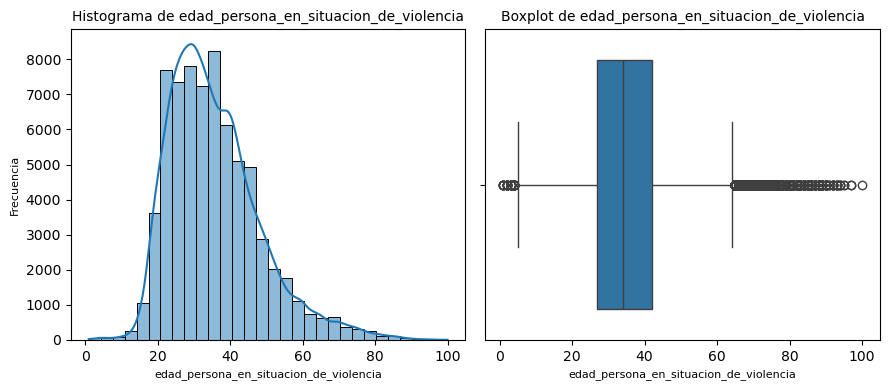

Estadísticas principales de edad_persona_en_situacion_de_violencia:
count    70638.000000
mean        35.700770
std         12.584909
min          1.000000
25%         27.000000
50%         34.000000
75%         42.000000
max        100.000000
Name: edad_persona_en_situacion_de_violencia, dtype: float64




In [37]:
# Visualización variable: edad persona en situación de violencia
columnas_numericas = ['edad_persona_en_situacion_de_violencia']

# Generar un histograma y un boxplot por cada variable
for variable in columnas_numericas:
    plt.figure(figsize=(9, 4))  # Ajustar el tamaño de la figura para mayor espacio
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df_144[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}', fontsize=10)  # Reducir tamaño del título
    plt.xlabel(variable, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df_144[variable])
    plt.title(f'Boxplot de {variable}', fontsize=10)  # Reducir tamaño del título
    plt.xlabel(variable, fontsize=8)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()
    
    # Mostrar las principales estadísticas de la variable
    print(f"Estadísticas principales de {variable}:")
    print(df_144[variable].describe())
    print("\n" + "="*50 + "\n")

**Interpretación:**

Las visualizaciones revelan que la mayoría de los casos de violencia se concentran en adultos jóvenes, con un número decreciente de casos a medida que aumenta la edad. **El rango total de las edades reportadas va desde 0 hasta cerca de 100 años, lo que refleja una gran diversidad en la edad de las personas que se encuentran en situaciones de violencia.**

* **Distribución: año según los reportes**

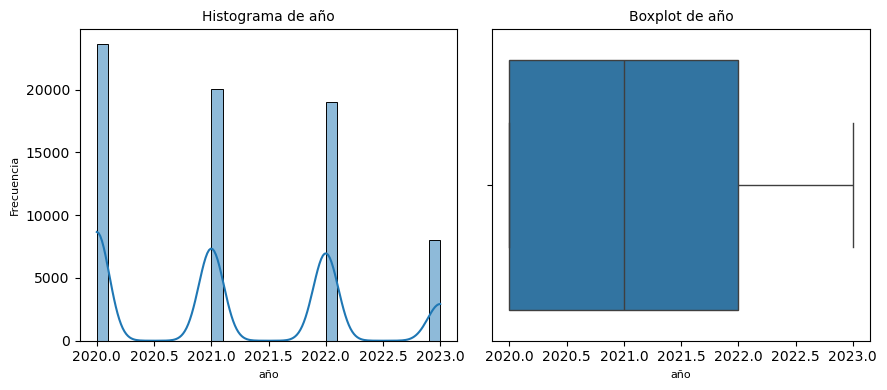

Estadísticas principales de año:
count    70638.000000
mean      2021.160565
std          1.014908
min       2020.000000
25%       2020.000000
50%       2021.000000
75%       2022.000000
max       2023.000000
Name: año, dtype: float64




In [38]:
# Visualización variable: año
columnas_numericas = ['año']

# Generar un histograma y un boxplot por cada variable
for variable in columnas_numericas:
    plt.figure(figsize=(9, 4))  # Ajustar el tamaño de la figura para mayor espacio
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df_144[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}', fontsize=10)  # Reducir tamaño del título
    plt.xlabel(variable, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df_144[variable])
    plt.title(f'Boxplot de {variable}', fontsize=10)  # Reducir tamaño del título
    plt.xlabel(variable, fontsize=8)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()
    
    # Mostrar las principales estadísticas de la variable
    print(f"Estadísticas principales de {variable}:")
    print(df_144[variable].describe())
    print("\n" + "="*50 + "\n")

**Interpretación:**

El rango de los datos abarca desde el año 2020 hasta 2023, reflejando que el conjunto de datos cubre un periodo de cuatro años. La mediana de los años de reporte está alrededor de 2021. La mitad de los datos se encuentra entre 2020 y 2022, lo que sugiere que estos son los años con la mayor cantidad de reportes.

* **Distribución: mes según los casos reportados**

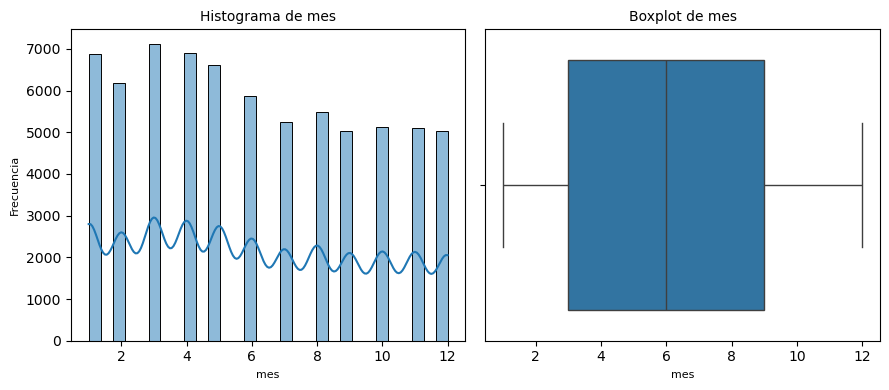

Estadísticas principales de mes:
count    70638.000000
mean         6.094595
std          3.433434
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: mes, dtype: float64




In [39]:
# Visualización variable: mes
columnas_numericas = ['mes']

# Generar un histograma y un boxplot por cada variable
for variable in columnas_numericas:
    plt.figure(figsize=(9, 4))  # Ajustar el tamaño de la figura para mayor espacio
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df_144[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}', fontsize=10)  # Reducir tamaño del título
    plt.xlabel(variable, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df_144[variable])
    plt.title(f'Boxplot de {variable}', fontsize=10)  # Reducir tamaño del título
    plt.xlabel(variable, fontsize=8)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()
    
    # Mostrar las principales estadísticas de la variable
    print(f"Estadísticas principales de {variable}:")
    print(df_144[variable].describe())
    print("\n" + "="*50 + "\n")

**Interpretación:**

Se observan picos al inicio del año, especialmente en enero y marzo, lo que podría sugerir que en estos meses se reportan más casos. Sin embargo, la diferencia con los otros meses no es dramática, indicando que los reportes están distribuidos de manera bastante pareja a lo largo del año.

* **Distribución: día según los casos reportados**

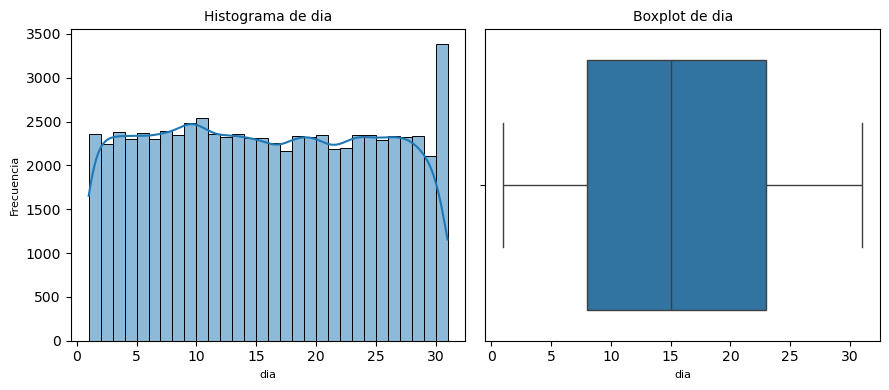

Estadísticas principales de dia:
count    70638.000000
mean        15.626405
std          8.790121
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: dia, dtype: float64




In [40]:
# Visualización variable: día
columnas_numericas = ['dia']

# Generar un histograma y un boxplot por cada variable
for variable in columnas_numericas:
    plt.figure(figsize=(9, 4))  # Ajustar el tamaño de la figura para mayor espacio
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df_144[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}', fontsize=10)  # Reducir tamaño del título
    plt.xlabel(variable, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df_144[variable])
    plt.title(f'Boxplot de {variable}', fontsize=10)  # Reducir tamaño del título
    plt.xlabel(variable, fontsize=8)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()
    
    # Mostrar las principales estadísticas de la variable
    print(f"Estadísticas principales de {variable}:")
    print(df_144[variable].describe())
    print("\n" + "="*50 + "\n")

**Interpretación:**

El rango de los datos cubre todos los días posibles de un mes (del 1 al 31), lo cual es esperado y muestra que la recolección de datos se realiza de manera continua durante todo el mes. La distribución de reportes diarios es bastante uniforme, con un ligero aumento al final del mes, especialmente en el día 30, posiblemente debido a factores relacionados con el proceso de reporte.

* **Distribución de casos reportados por Provincia**

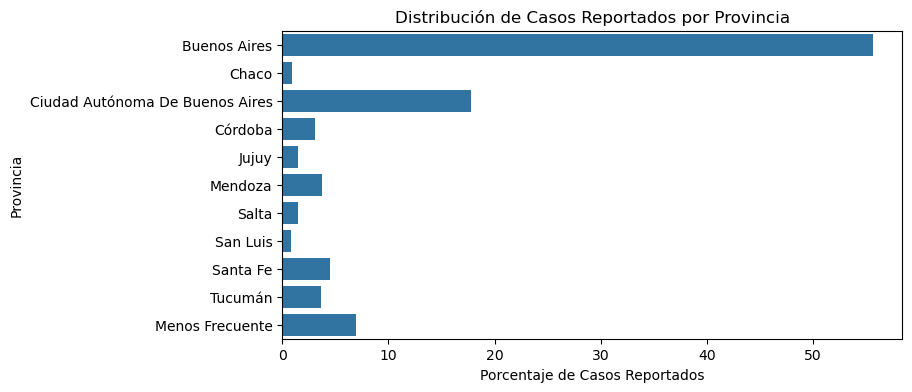

In [41]:
# Identificar las columnas relacionadas con 'prov_filtrado'
prov_columns = [col for col in df_144.columns if col.startswith('prov_filtrado_')]

# Sumar las columnas codificadas para obtener la cantidad de casos por provincia
prov_counts = df_144[prov_columns].sum()

# Calcular porcentajes
prov_percentage = (prov_counts / prov_counts.sum()) * 100

# Crear un DataFrame temporal para los porcentajes
temp_df = pd.DataFrame({'Provincia': prov_columns, 'Porcentaje': prov_percentage.values})

# Reemplazar los nombres para mejor visualización
temp_df['Provincia'] = temp_df['Provincia'].str.replace('prov_filtrado_', '').str.replace('_', ' ').str.title()

# Crear un gráfico de barras horizontales con Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Porcentaje', y='Provincia', data=temp_df, orient='h')

# Añadir etiquetas y título
plt.xlabel('Porcentaje de Casos Reportados')
plt.ylabel('Provincia')
plt.title('Distribución de Casos Reportados por Provincia')

# Mostrar el gráfico
plt.show()

* Buenos aires, Ciudad Autónoma de Buenos Aires, Santa Fé, tucuman son las provincias donde más se registran casos reportados; **presentándose la mayor tendencia en La Ciudad de Buenos Aires.**

* **Distribución de casos reportados por género**

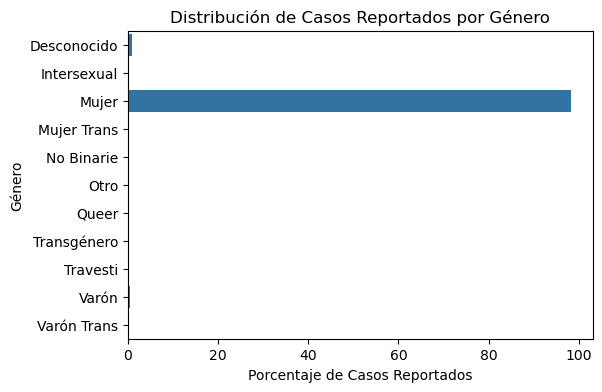

In [42]:
# Identificar las columnas relacionadas con 'casos reportados por género'
gender_columns = [col for col in df_144.columns if col.startswith('genero_persona_en_situacion_de_violencia_')]

# Sumar las columnas codificadas para obtener la cantidad de casos por género
gender_counts = df_144[gender_columns].sum()

# Calcular porcentajes
gender_percentage = (gender_counts / gender_counts.sum()) * 100

# Crear un DataFrame temporal para los porcentajes
temp_df_gender = pd.DataFrame({'Género': gender_columns, 'Porcentaje': gender_percentage.values})

# Reemplazar los nombres para mejor visualización
temp_df_gender['Género'] = temp_df_gender['Género'].str.replace('genero_persona_en_situacion_de_violencia_', '').str.replace('_', ' ').str.title()

# Crear un gráfico de barras horizontales
plt.figure(figsize=(6, 4))
sns.barplot(x='Porcentaje', y='Género', data=temp_df_gender)

# Añadir etiquetas y título
plt.xlabel('Porcentaje de Casos Reportados')
plt.ylabel('Género')
plt.title('Distribución de Casos Reportados por Género')

# Mostrar el gráfico
plt.show()


* El género de persona en situación  de violencia con la mayor tendencia es **Mujer con una cifra superior a los 70.000 reportes que equivalen al 99.1% de los casos**, lo cual no es sorpresivo siendo esta línea enfocado a asistencia a la mujer, los demás géneros y reportes incluyen a las personas de la comunidad LGBTQ+

* **Distribución de casos reportados según el país de nacimiento de la persona en situación de violencia**

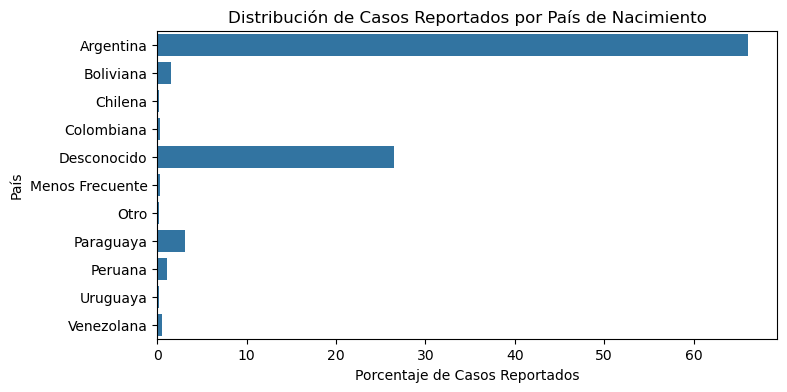

In [43]:
# Identificar las columnas relacionadas con 'pais_filtrado'
country_columns = [col for col in df_144.columns if col.startswith('pais_filtrado_')]

# Sumar las columnas codificadas para obtener la cantidad de casos por país de nacimiento
country_counts = df_144[country_columns].sum()

# Calcular porcentajes
country_percentage = (country_counts / country_counts.sum()) * 100

# Crear un DataFrame temporal para los porcentajes
temp_df_country = pd.DataFrame({'País': country_columns, 'Porcentaje': country_percentage.values})

# Reemplazar los nombres para mejor visualización
temp_df_country['País'] = temp_df_country['País'].str.replace('pais_filtrado_', '', regex=False)
temp_df_country['País'] = temp_df_country['País'].str.replace('_', ' ').str.title()

# Crear un gráfico de barras horizontales para el país de nacimiento
plt.figure(figsize=(8, 4))
sns.barplot(x='Porcentaje', y='País', data=temp_df_country)

# Añadir etiquetas y título
plt.xlabel('Porcentaje de Casos Reportados')
plt.ylabel('País')
plt.title('Distribución de Casos Reportados por País de Nacimiento')

# Mostrar el gráfico
plt.show()

* El país de nacimiento de la persona en situación de Violencia que más se reporta es **Argentina**, seguido por Paraguay, Bolivia, Perú y Venezuela; sin embargo es importante considerar que la segunda tendencia aparece como _desconocido_ con al rededor de 30.000 registros, que equivalen al 26.9% de los casos. 

* **Distribución de casos reportados por vínculo con la persona agresora**

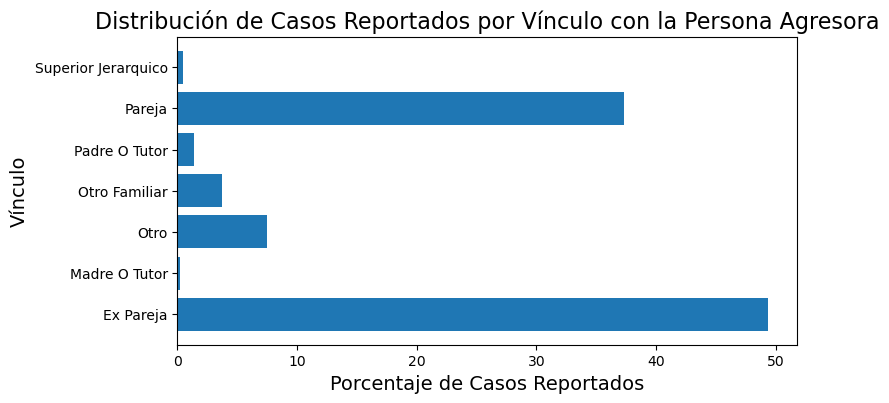

In [44]:
# Identificar las columnas relacionadas con 'vinculo_con_la_persona_agresora'
vinculo_columns = [col for col in df_144.columns if col.startswith('vinculo_con_la_persona_agresora_')]

# Sumar las columnas codificadas para obtener la cantidad de casos por vínculo
vinculo_counts = df_144[vinculo_columns].sum()

# Calcular porcentajes
vinculo_percentage = (vinculo_counts / vinculo_counts.sum()) * 100

# Crear un DataFrame temporal para los porcentajes
temp_df_vinculo = pd.DataFrame({'Vínculo': vinculo_columns, 'Porcentaje': vinculo_percentage.values})

# Reemplazar los underscores y ajustar nombres para mejor visualización
temp_df_vinculo['Vínculo'] = temp_df_vinculo['Vínculo'] \
    .str.replace('vinculo_con_la_persona_agresora_', '') \
    .str.replace('_', ' ') \
    .str.title()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(temp_df_vinculo['Vínculo'], temp_df_vinculo['Porcentaje'])

# Añadir etiquetas y título
plt.xlabel('Porcentaje de Casos Reportados', fontsize=14)
plt.ylabel('Vínculo', fontsize=14)
plt.title('Distribución de Casos Reportados por Vínculo con la Persona Agresora', fontsize=16)

# Mostrar el gráfico
plt.show()

* La persona agresora de la que **mayor reporte de casos se registran es la expareja con al rededor de 34.861 que equivale al 48.2%** de los casos seguido por la pareja con al rededor de 26.390, que equivale al 36.5%. 

* **Distribución de casos reportados por Género del agresor**

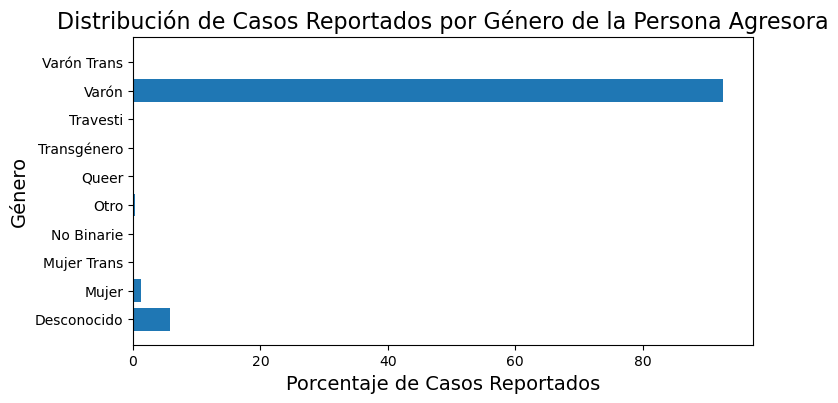

In [45]:
# Identificar las columnas relacionadas con 'genero_de_la_persona_agresora'
genero_agresor_columns = [col for col in df_144.columns if col.startswith('genero_de_la_persona_agresora_')]

# Sumar las columnas codificadas para obtener la cantidad de casos por género
genero_agresor_counts = df_144[genero_agresor_columns].sum()

# Calcular porcentajes
genero_agresor_percentage = (genero_agresor_counts / genero_agresor_counts.sum()) * 100

# Crear un DataFrame temporal para los porcentajes
temp_df_genero_agresor = pd.DataFrame({'Género': genero_agresor_columns, 'Porcentaje': genero_agresor_percentage.values})

# Reemplazar los underscores por espacios y capitalizar los nombres para mejor visualización
temp_df_genero_agresor['Género'] = temp_df_genero_agresor['Género'].str.replace('genero_de_la_persona_agresora_', '').str.replace('_', ' ').str.title()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(temp_df_genero_agresor['Género'], temp_df_genero_agresor['Porcentaje'])

# Añadir etiquetas y título
plt.xlabel('Porcentaje de Casos Reportados', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.title('Distribución de Casos Reportados por Género de la Persona Agresora', fontsize=16)

# Mostrar el gráfico
plt.show()

* En más de 70.000 de los casos reportados el **género de la persona agresora es Varón que equivale al 98.4% del total de los casos**, seguido en una mínima proporción por mujer 1.2%**

* **Distribución de casos por tipo y modalidad de violencia**

In [46]:
# Verificar los totales para cada variable
# Definir las columnas categóricas binarias
binary_categorical_columns = [
    'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras'
]

# Crear una lista para almacenar los totales
totales_list = []

# Contabilizar los totales para cada variable
for column in binary_categorical_columns:
    count_yes = df_144[column].sum()  # Total de 1s
    count_no = len(df_144[column]) - count_yes  # Total de 0s
    totales_list.append({'Variable': column, 'Sí (1)': count_yes, 'No (0)': count_no})

# Convertir la lista de diccionarios en un DataFrame
totales = pd.DataFrame(totales_list)

# Mostrar los totales
totales

,Variable,Sí (1),No (0)
0,tipo_de_violencia_fisica,47872,22766
1,tipo_de_violencia_psicologica,67912,2726
2,tipo_de_violencia_sexual,10581,60057
3,tipo_de_violencia_economica_y_patrimonial,30078,40560
4,tipo_de_violencia_simbolica,25445,45193
5,tipo_de_violencia_domestica,65251,5387
6,modalidad_de_violencia_institucional,1066,69572
7,modalidad_de_violencia_laboral,901,69737
8,modalidad_violencia_contra_libertad_reproductiva,362,70276
9,modalidad_de_violencia_obstetrica,58,70580


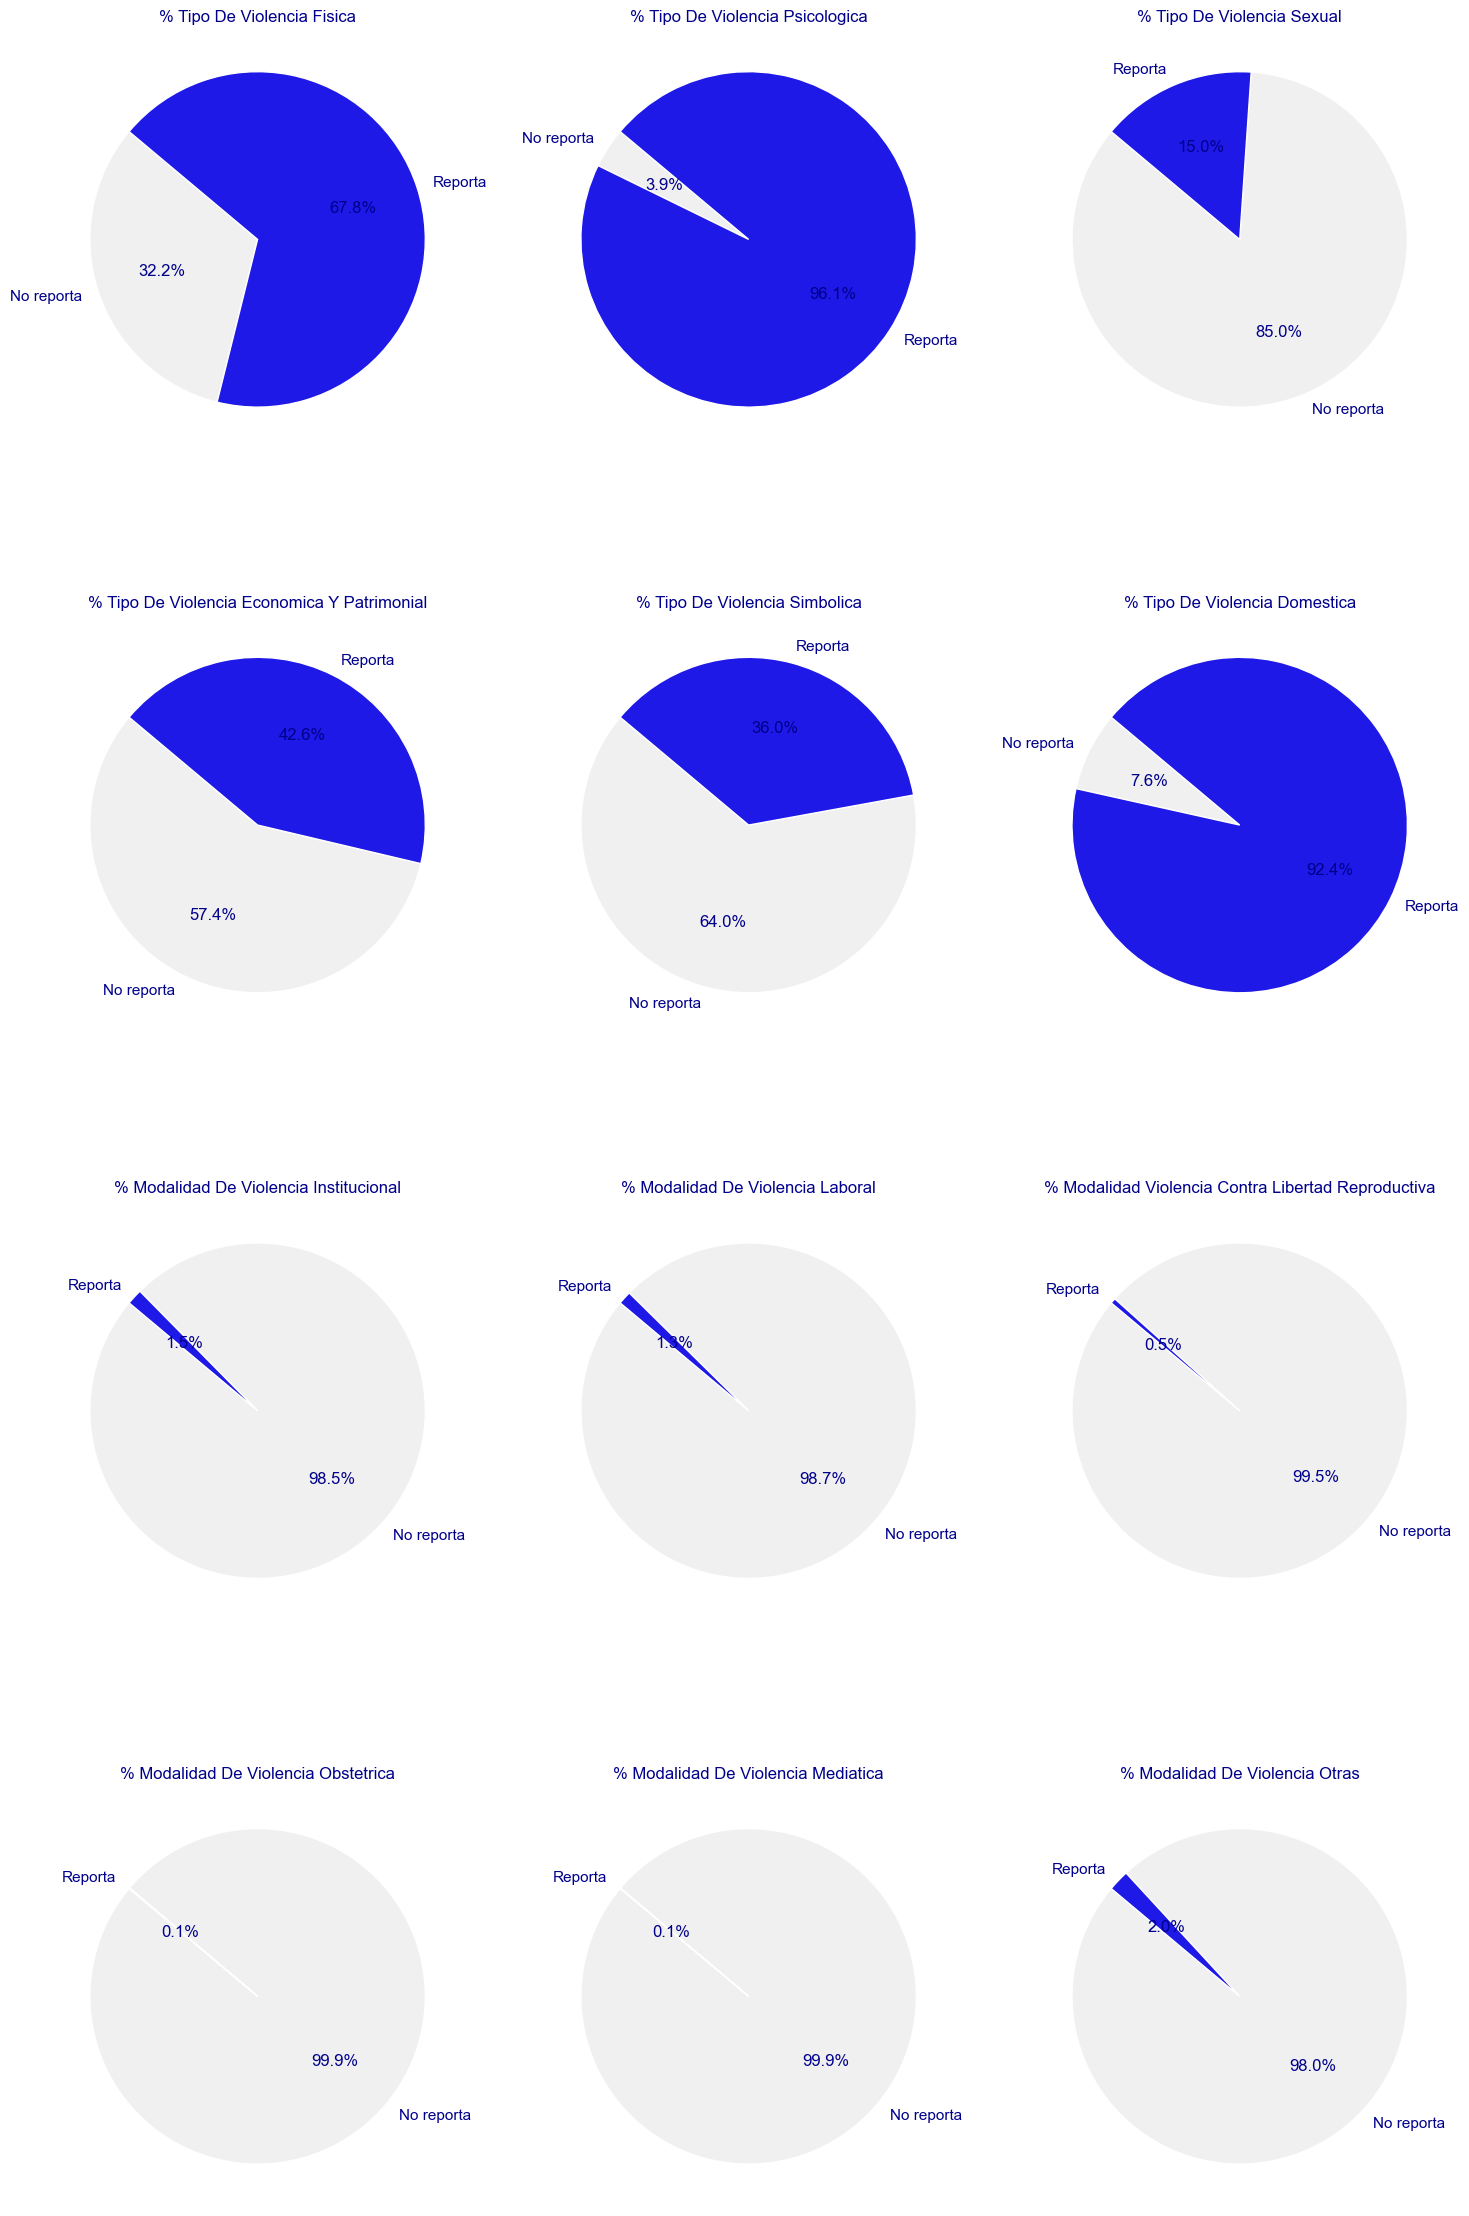

In [47]:
# Definir las columnas categóricas binarias
binary_categorical_columns = [
    'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras'
]

# Establecer estilo y colores
sns.set(style="whitegrid")
color = "#1E19E6"
title_and_label_color = "#00008B"  # Azul oscuro
background_color = "#f0f0f0"

# Configuración de la figura y ejes
fig, axes = plt.subplots(nrows=(len(binary_categorical_columns) + 2) // 3, ncols=3, figsize=(15, len(binary_categorical_columns) * 2))
axes = axes.flatten()  # Aplanar el array de ejes para facilitar el acceso

# Crear gráficos de pie para cada variable categórica binaria
for i, column in enumerate(binary_categorical_columns):
    # Calcular las proporciones de cada categoría (0 y 1)
    counts = df_144[column].value_counts(normalize=True) * 100
    
    # Asegurar que los valores estén en el orden correcto
    counts = counts.reindex([0, 1], fill_value=0)
    
    labels = ['No reporta', 'Reporta']
    
    # Crear el gráfico de pie
    wedges, texts, autotexts = axes[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, 
                                           colors=[background_color, color], textprops={'color': title_and_label_color})
    axes[i].set_title(f'% {column.replace("_", " ").title()}', fontsize=12, color=title_and_label_color)
    axes[i].set_facecolor(background_color)

# Eliminar los ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.tight_layout()
plt.show()

Los tpos de violencia con mayor tendencia son: **1. violencia psicológica en el 96.1% de los reportes, 2. violencia doméstica en el 92.4% de los reportes, 3. violencia física en el 67.8% de los reportes 4.violencia económica y patrimonial en el 42.6% de los casos y 5. violencia simbólica ca presente en el 36% de los reportes**. Es importante considerar que una sola persona puede ser victima, _de manera simultánea_, de varios tipos de violencia lo que se denomina _**persona en situación de violencia múltiple**_ o en el caso de ser víctima de violencia en diferentes momentos de su vida se denomina _violencia poli-victimización_.

_Para este proyecto se considera la persona en situación de violencia múltiple_ Donde en un solo reporte la victima o un testigo de ella manifiesta uno o más de tipos de violencia simultánea. Por ello se crea una nueva variable dentro del Dataset denominada **violencia_multiple** para identificar la cantidad de casos que presentan más de un tipo de violencia de manera simultánea. 

Dentro de la clasificación del tipo de violencia contra la mujer y LGTBQ+, de los datos recogidos,  no se considera la _**violencia vicaria**_ término acuñado desde el 2012 para hacer referencia a la violencia de género por la cual los hijos e hijas de las mujeres víctimas de violencia son instrumentalizados como objeto para maltratar y ocasionar dolor a sus madres. Así mismo el registro no incluye aspectos como reincidencia con lo cual se podría predecir probabilidad de reincidencia en otros casos lo que podría ayudar a adelantar acciones preventivas focalizadas.

## **Análisis Bivariado y Multivariado:** 
### Respuesta a preguntas Clave

### **¿Qué porcentaje del total de los casos reportan más de un tipo de violencia de manera simultánea?**

* **Objetivo:** Identificar el procentaje de casos en los que las víctimas estan en situación de violencia múltiple

In [48]:
# Creabdo la columna violencia_múltiple
# Definir las columnas categóricas binarias
binary_categorical_columns = [
    'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras'
]

# Crear una nueva columna que indique si hay más de un tipo de violencia reportada
df_144['multiple_violences_reported'] = df_144[binary_categorical_columns].sum(axis=1) > 1

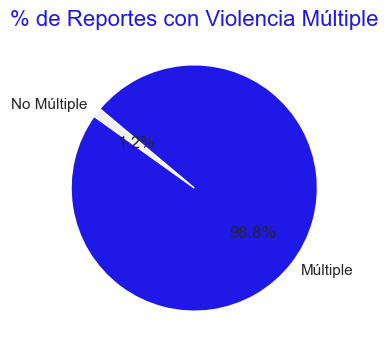

In [49]:
# Contar los casos con y sin violencia múltiple
violencia_multiple_counts = df_144['multiple_violences_reported'].value_counts(normalize=True) * 100

# Establecer el color azul oscuro
color_azul_oscuro = "#1E19E6"

# Reordenar para asegurar que el orden sea 'No Múltiple' y 'Múltiple'
labels = ['No Múltiple', 'Múltiple']
violencia_multiple_counts = violencia_multiple_counts.reindex([False, True], fill_value=0)

# Crear gráfico de pie
plt.figure(figsize=(8, 4))
wedges, texts, autotexts = plt.pie(
    violencia_multiple_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#f0f0f0', color_azul_oscuro]  # Fondo gris claro y azul oscuro
)

# Establecer título
plt.title('% de Reportes con Violencia Múltiple', fontsize=16, color=color_azul_oscuro)

# Configurar el color de fondo del gráfico
plt.gca().set_facecolor("#f0f0f0")

# Mostrar gráfico
plt.show()

* Conclusión: El **_98.8%_** de los casos reportan multiples tipos de violencia sufrida de manera simultánea.

### **¿Qué tipos de violencia tienen la mayor tendencia a ocurrir simultáneamente en los casos reportados?**

* **Objetivo:** Determinar la co-ocurrencia de distintos tipos de violencia en un mismo reporte, identificando patrones de violencia múltiple para mejorar la comprensión y la intervención en casos de violencia.

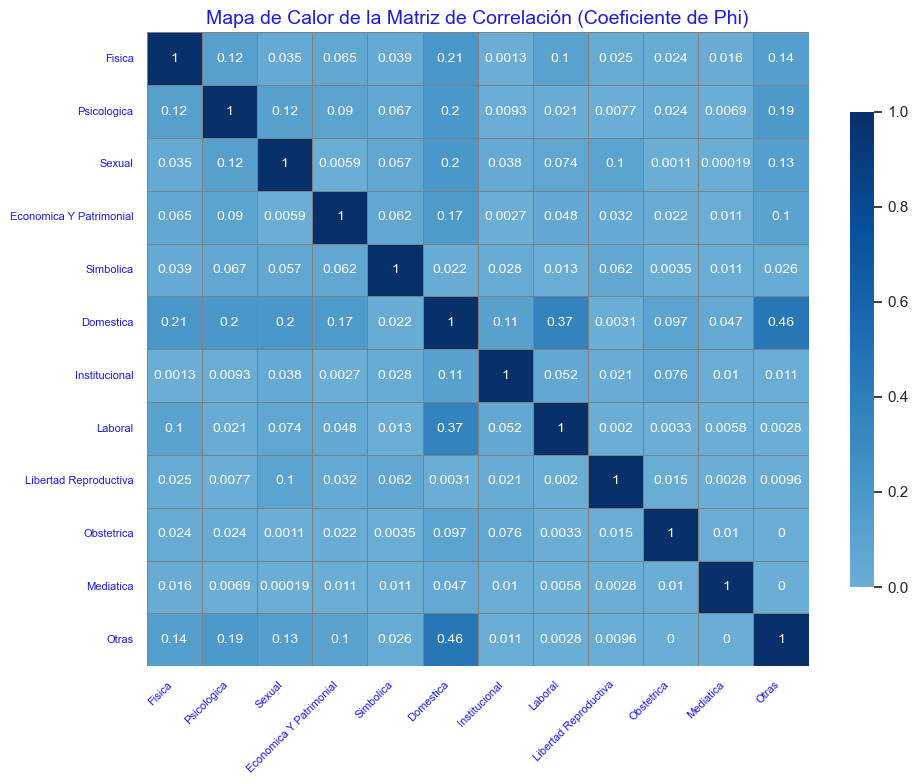

In [50]:
#Matriz de correlación de variables de tipo binario (Son las del tipo de violencia)
from scipy.stats import chi2_contingency

# Variables de tipos de violencia
variables = [
    'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras'
]

# Seleccionar solo las columnas relevantes del DataFrame
df_violencia = df_144[variables]

# Función para calcular el coeficiente de Phi
def phi_coefficient(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi = np.sqrt(chi2 / n)
    return phi

# Crear una matriz de correlación usando el coeficiente de Phi
n = df_violencia.shape[1]
phi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            phi_matrix[i, j] = phi_coefficient(df_violencia.iloc[:, i], df_violencia.iloc[:, j])
        else:
            phi_matrix[i, j] = 1  # La correlación de una variable consigo misma es 1

# Crear etiquetas simplificadas eliminando los prefijos
simplified_labels = [
    col.replace('tipo_de_violencia_', '')
       .replace('modalidad_de_violencia_', '')
       .replace('modalidad_violencia_contra_libertad_reproductiva', 'Libertad Reproductiva')
       .replace('_', ' ').title()
    for col in variables
]

# Convertir la matriz de Phi a un DataFrame para mejor visualización
phi_df = pd.DataFrame(phi_matrix, columns=simplified_labels, index=simplified_labels)

# Configuración del estilo y colores del mapa de calor
sns.set(style="whitegrid")  # Estilo de fondo claro con cuadrícula
cmap = sns.color_palette("Blues", as_cmap=True)  # Paleta de colores secuencial en tonos de azul

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(phi_df, annot=True, cmap=cmap, center=0, linewidths=0.5, linecolor='gray',
            cbar_kws={"shrink": .75}, annot_kws={"size": 10})

# Configuraciones adicionales
plt.title('Mapa de Calor de la Matriz de Correlación (Coeficiente de Phi)', fontsize=14, color='#1E19E6')
plt.xticks(rotation=45, ha='right', fontsize=8, color='#1E19E6')
plt.yticks(fontsize=8, color='#1E19E6')
plt.gca().set_facecolor('#f0f0f0')  # Fondo gris claro
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()

**Conclusiones**

* **Valores Destacados:**

La violencia doméstica y otros tipos de violencia: (0.46) Tienen una correlación moderada, sugiriendo que estos tipos de violencia tienden a ocurrir juntos con cierta frecuencia.

La violencia doméstica y violencia laboral: (0.37) También muestra una correlación moderada, lo que sugiere una co-ocurrencia notable entre estos tipos de violencia.Lo cual es interesante para análisis más profundo en cuanto a si el ser víctima de violencia en el hogar es un factor de riesgo para sufrir violencias en otros tipos de contextos sociales. 

La violencia doméstica y violencia psicológica: (0.2) Indica que estos tipos de violencia tienden a ocurrir juntos con mayor frecuencia que con otros tipos de violencia.

**La violencia doméstica es el tipo de violencia que más tiene correlación con otro tipo de violencias reportadas**

* **Asociaciones Débiles:** 
La mayoría de los otros valores están relativamente cerca de 0, lo que indica que no hay una fuerte tendencia a la co-ocurrencia entre esos tipos de violencia.

### **¿Cómo han variado los reportes entre los años 2020 y 2023?**

* **Objetivo:** Descubrir a partir de la combinación de las variables año y mes dónde se presentan las mayores tendencias

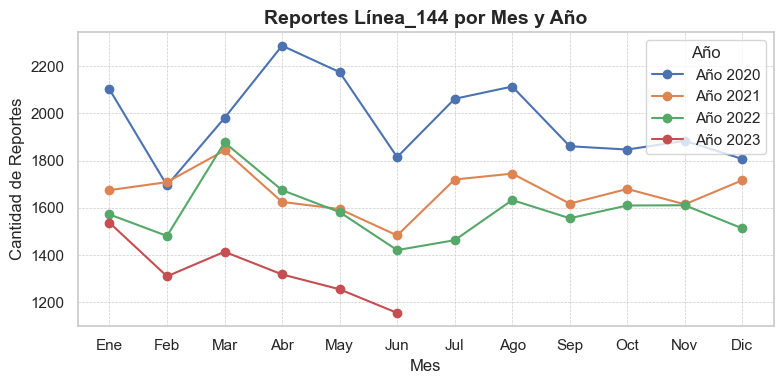

In [51]:
# Calcular el número de reportes por cada combinación de año y mes
reportes_por_mes = df_144.groupby(['año', 'mes']).size().reset_index(name='cantidad')

# Crear una figura y ejes
plt.figure(figsize=(8, 4))

# Graficar la línea para cada año
for año in reportes_por_mes['año'].unique():
    # Filtrar datos para el año actual
    data = reportes_por_mes[reportes_por_mes['año'] == año]
    # Graficar la línea
    plt.plot(data['mes'], data['cantidad'], marker='o', label=f'Año {año}')

# Personalizar el gráfico
plt.title('Reportes Línea_144 por Mes y Año', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Reportes', fontsize=12)
plt.xticks(ticks=list(range(1, 13)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks()
plt.legend(title='Año')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Tendencias generales por año**

* En 2020, se observa un pico en marzo que aumenta en abril, seguido de una disminución y luego una cierta estabilidad.
* En 2021, hay un aumento en marzo y abril, y luego se estabiliza con una ligera tendencia descendente hasta septiembre, presentandose nuevamente un aumento en el útimo trimestre del año.
* En 2022, el número de reportes es relativamente constante, aunque disminuye un poco hacia el final del año. Presentándose como en los años anteriores el pico más alto en marzo. 
* En 2023, hay una tendencia general a la baja desde enero hasta junio que es la fecha de la que se tienen los últimos registros para este estudio.

**Comparación entre años:**

* 2020 tiene la mayor cantidad de reportes en la mayoría de los meses, especialmente en marzo.
* 2021 y 2022 tienen un comportamiento bastante similar, con reportes moderadamente altos pero menos que en 2020.
* 2023 tiene consistentemente el menor número de reportes cada mes.

**Estacionalidad y eventos específicos:**

* Es posible que el pico en marzo de 2020 esté relacionado con el inicio de la pandemia de COVID-19 y las restricciones asociadas.
* Los datos podrían reflejar patrones estacionales, pero también podrían estar influenciados por eventos específicos relacionados con el sistema de gestión de reportes o con el retorno a la presencialidad posterior al covid-19 y que se vio de manera más clara durante ese año. 

### **¿Existe una relación entre sufrir violencia doméstica y la vulnerabilidad a experimentar múltiples tipos de violencia de manera simultánea?**

* **Objetivo:** Determinar si la experiencia de violencia doméstica incrementa la vulnerabilidad de las víctimas a otras formas de violencia, lo que podría señalar la necesidad de enfoques de intervención más amplios e integrales.

Para responder a esta pregunta se utiliza una combinación de pruebas estadísticas: Chi cuadrado y coeficiente de Phi, que permitirán: 

1. Tener consistencia en los Resultados: La combinación de ambas pruebas proporciona una visión más completa del fenómeno estudiado. La prueba de Chi-cuadrado asegura que los resultados no son producto del azar, mientras que el coeficiente de Phi ofrece una medida de la consistencia y la fuerza de la relación.

2. le dan validez del Estudio: Utilizar ambas pruebas refuerza la validez interna del estudio, asegurando que las conclusiones se basan en análisis estadísticos sólidos y apropiados para la naturaleza de los datos.

In [52]:
# Aplicando Chi-cuadrado para responder la pregunta

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_144['tipo_de_violencia_domestica'], df_144['multiple_violences_reported'])

# Aplicar la prueba de chi cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Mostrar los resultados
print(f'Chi-cuadrado: {chi2}')
print(f'P-valor: {p}')
print(f'Grados de libertad: {dof}')
print('Tabla de frecuencias esperadas:')
print(expected)

# Interpretar los resultados
if p < 0.05:
    print("Existe una relación significativa entre la violencia doméstica y la condición de sufrir más de un tipo de violencia simultánea.")
else:
    print("No existe una relación significativa entre la violencia doméstica y la condición de sufrir más de un tipo de violencia simultánea.")

Chi-cuadrado: 6327.104286169967
P-valor: 0.0
Grados de libertad: 1
Tabla de frecuencias esperadas:
[[   66.57678587  5320.42321413]
 [  806.42321413 64444.57678587]]
Existe una relación significativa entre la violencia doméstica y la condición de sufrir más de un tipo de violencia simultánea.


In [53]:
#Aplicando Coeficiente de Phi 
# Crear una tabla de contingencia (ya creada anteriormente con 'pd.crosstab')
contingency_table = pd.crosstab(df_144['tipo_de_violencia_domestica'], df_144['multiple_violences_reported'])

# Convertir la tabla de contingencia en una matriz NumPy
contingency_matrix = contingency_table.to_numpy()

# Calcular el coeficiente de Phi
phi = (contingency_matrix[0, 0] * contingency_matrix[1, 1] - contingency_matrix[0, 1] * contingency_matrix[1, 0]) / np.sqrt(
    (contingency_matrix[0, 0] + contingency_matrix[0, 1]) * 
    (contingency_matrix[0, 0] + contingency_matrix[1, 0]) * 
    (contingency_matrix[1, 1] + contingency_matrix[0, 1]) * 
    (contingency_matrix[1, 1] + contingency_matrix[1, 0])
)

# Mostrar el coeficiente de Phi
print(f'Coeficiente Phi: {phi}')

Coeficiente Phi: 0.29952524967922267


**Conclusión:**

El análisis realizado para investigar la relación entre la violencia doméstica y la vulnerabilidad a experimentar múltiples tipos de violencia simultáneamente ha revelado resultados significativos. A continuación, se presentan las conclusiones basadas en los resultados obtenidos de las pruebas estadísticas:

**Asociación Significativa entre Violencia Doméstica y Múltiples Tipos de Violencia:**

Los resultados de la prueba de Chi-cuadrado indicaron una asociación altamente significativa entre la violencia doméstica y la experiencia de múltiples tipos de violencia simultáneamente. Con un valor de Chi-cuadrado de 6327.10 y un p-valor de 0.0, se rechaza contundentemente la hipótesis nula de independencia entre estas variables. Esto confirma que existe una conexión estadísticamente significativa entre sufrir violencia doméstica y la vulnerabilidad a experimentar otras formas de violencia de manera simultánea.

**Asociación Moderada Identificada por el Coeficiente de Phi:**

El coeficiente de Phi calculado fue de 0.2995, lo que indica una asociación moderada entre estas variables. Este valor sugiere que, aunque la relación no es extremadamente fuerte, existe una probabilidad moderada de que las personas que sufren violencia doméstica también experimenten otros tipos de violencia de manera simultánea.

**Estos hallazgos subrayan la importancia de abordar la violencia doméstica no como un fenómeno aislado, sino en el contexto de una mayor vulnerabilidad a otros tipos de violencia. La asociación significativa identificada en este análisis sugiere que las víctimas de violencia doméstica requieren una atención integral que considere la posibilidad de múltiples formas de abuso. Esta perspectiva es crucial para desarrollar estrategias efectivas de prevención y protección que puedan mitigar los riesgos y brindar un apoyo más completo a las personas afectadas.**

### **¿Existe una conexión significativa entre los casos de violencia doméstica y los reportes de violencia económica y patrimonial?**

* **Objetivo:** Descubrir si en los casos reportados con violencia doméstica hay algún tipo de prevalencia de la violencia economica y patrimonial lo que podria limitar los recursos y aumentar el riesgo de quienes experimentan violencia dentro de sus hogares.

In [54]:
# Aplicando Chi Cuadrado para responder la pregunta
# Crear una tabla de contingencia con los nombres correctos de las columnas
contingency_table = pd.crosstab(df_144['tipo_de_violencia_domestica'], df_144['tipo_de_violencia_economica_y_patrimonial'])

# Mostrar la tabla de contingencia
print(contingency_table)

# Aplicar la prueba de chi cuadrado
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

# Mostrar los resultados
print(f'Chi2: {chi2}')
print(f'P-valor: {p}')
print(f'Grados de libertad: {dof}')
print('Frecuencias esperadas:')
print(ex)

# Interpretación del resultado
if p < 0.05:
    print("Existe una conexión significativa entre la violencia doméstica y la violencia económica y patrimonial.")
else:
    print("No existe una conexión significativa entre la violencia doméstica y la violencia económica y patrimonial.")

tipo_de_violencia_economica_y_patrimonial      0      1
tipo_de_violencia_domestica                            
0                                           4695    692
1                                          35865  29386
Chi2: 2107.5856675604086
P-valor: 0.0
Grados de libertad: 1
Frecuencias esperadas:
[[ 3093.1895014  2293.8104986]
 [37466.8104986 27784.1895014]]
Existe una conexión significativa entre la violencia doméstica y la violencia económica y patrimonial.


In [55]:
# Aplicando Coeficiente de Phi (alternativa a Chi Cuadrado para tablas de contingencia 2X2)
# Convertir la tabla de contingencia en una matriz NumPy
contingency_matrix = contingency_table.to_numpy()

# Calcular el coeficiente de Phi
phi = (contingency_matrix[0, 0] * contingency_matrix[1, 1] - contingency_matrix[0, 1] * contingency_matrix[1, 0]) / np.sqrt(
    (contingency_matrix[0, 0] + contingency_matrix[0, 1]) * 
    (contingency_matrix[0, 0] + contingency_matrix[1, 0]) * 
    (contingency_matrix[1, 1] + contingency_matrix[0, 1]) * 
    (contingency_matrix[1, 1] + contingency_matrix[1, 0])
)

# Mostrar el coeficiente de Phi
print(f'Coeficiente Phi: {phi}')

Coeficiente Phi: 0.17278618103665688


**Conclusiones:**

El análisis realizado para determinar si existe una conexión significativa entre los casos de violencia doméstica y los reportes de violencia económica y patrimonial ha revelado resultados importantes. A continuación, se presentan las conclusiones basadas en los resultados obtenidos de las pruebas estadísticas:

**Asociación Significativa entre Violencia Doméstica y Violencia Económica y Patrimonial:**

Los resultados de la prueba de Chi-cuadrado indicaron una asociación significativa entre la violencia doméstica y la violencia económica y patrimonial. Con un valor de Chi-cuadrado de 2107.59 y un p-valor de 0.0, se rechaza la hipótesis nula de independencia entre estas variables, confirmando que existe una conexión estadísticamente significativa. Esto sugiere que estos tipos de violencia tienden a coexistir en los casos reportados.

**Relación Débil Identificada por el Coeficiente de Phi:**

El coeficiente de Phi calculado fue de 0.1728, lo que indica que, aunque existe una relación estadísticamente significativa entre la violencia doméstica y la violencia económica y patrimonial, la fuerza de esta asociación es débil. Este valor sugiere que la presencia de violencia doméstica no es un predictor fuerte de la presencia de violencia económica y patrimonial, aunque ambas formas de violencia están relacionadas.

**Implicaciones para la Protección y el Apoyo a las Víctimas:**

Aunque la relación entre la violencia doméstica y la violencia económica y patrimonial es débil, su existencia es significativa y tiene importantes implicaciones para la protección y el apoyo a las víctimas. Es esencial que las políticas y programas de intervención consideren estas formas de violencia y ofrezcan soluciones integrales que aborden todas las dimensiones del abuso, garantizando una atención más completa y efectiva a las personas afectadas.

### **¿Cómo varía la cantidad de reportes de violencia a lo largo del año en diferentes provincias?**

* **Objetivo:** Identificar cómo cambian los reportes en cada año según la provincia en la que se genera el caso.

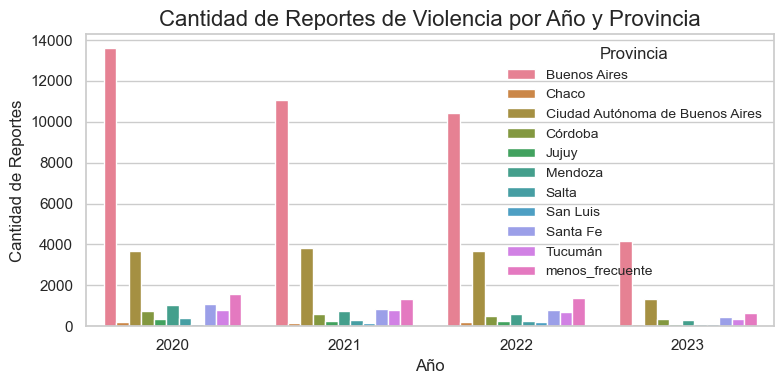

In [56]:
# Crear una nueva columna que enumere cada caso
df_144['cantidad_de_reportes'] = 1

# Lista de columnas codificadas de provincia
prov_columns = [col for col in df_144.columns if col.startswith('prov_filtrado_')]

# Crear una tabla pivot para obtener la cantidad de reportes por año y provincia
tabla_temporal = df_144.groupby('año')[prov_columns].sum().reset_index()

# Convertir la tabla pivot a un formato adecuado para un gráfico de barras en clúster
tabla_temporal = tabla_temporal.melt(id_vars='año', var_name='provincia', value_name='cantidad')

# Renombrar las columnas de provincia para que sean más legibles
tabla_temporal['provincia'] = tabla_temporal['provincia'].str.replace('prov_filtrado_', '')

# Crear figura y ejes
plt.figure(figsize=(8, 4))

# Crear gráfico de barras en clúster
sns.barplot(data=tabla_temporal, x='año', y='cantidad', hue='provincia')

# Personalizar etiquetas de ejes y título
plt.title('Cantidad de Reportes de Violencia por Año y Provincia', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Reportes', fontsize=12)
plt.xticks()
plt.yticks()

# Personalizar leyenda
plt.legend(title='Provincia', title_fontsize=12, fontsize=10, loc='upper right', frameon=False)

# Ajustar el diseño para evitar el solapamiento de elementos
plt.tight_layout()

# Mostrar gráfico
plt.show()

**Variación en los Reportes:**

* Se observa que Buenos Aires tiene una cantidad significativamente mayor de reportes en comparación con otras provincias. 

* Las barras en otras provincias muestran variaciones, pero generalmente en menor cantidad comparado con Buenos Aires.

* En algunos años, ciertos picos indican un aumento notable en los reportes para ciertas provincias.

**Para ampliar este análisis se calcula la tasa de reportes por provincia por cada mil habitantes**

### **¿Cuál es la tasa de reportes de violencia en cada provincia por cada mil habitantes?**

* **Objetivo:** Calcular la tasa de reporte de casos por cada mil habitantes según provincia que permita tener un indicador que otorgue una perspectiva más precisa y comparativa de la incidencia de la violencia en diferentes regiones. 

In [57]:
# Crear una columna con la cantidad de reportes
df_144['cantidad_de_reportes'] = 1

# Calcular la tasa de reportes por cada mil habitantes
df_144['tasa_reportes_por_mil'] = (df_144['cantidad_de_reportes'] / df_144['poblacion_provincia']) * 1000

# Crear una tabla pivot para obtener la tasa de reportes por año y provincia
prov_columns = [col for col in df_144.columns if col.startswith('prov_')]
df_144['provincia'] = df_144[prov_columns].idxmax(axis=1)

tabla_tasa = df_144.pivot_table(index='año', columns='provincia', 
                                          values='tasa_reportes_por_mil', aggfunc='sum')

# Convertir la tabla pivot a un formato adecuado para visualización
tabla_tasa = tabla_tasa.reset_index().melt(id_vars='año', var_name='provincia', value_name='tasa')

# Visualización de la tabla de tasa
print(tabla_tasa)

     año                                      provincia      tasa
0   2020                     prov_filtrado_Buenos Aires  0.773861
1   2021                     prov_filtrado_Buenos Aires  0.628662
2   2022                     prov_filtrado_Buenos Aires  0.594113
3   2023                     prov_filtrado_Buenos Aires  0.238488
4   2020                            prov_filtrado_Chaco  0.011668
5   2021                            prov_filtrado_Chaco  0.009392
6   2022                            prov_filtrado_Chaco  0.010701
7   2023                            prov_filtrado_Chaco  0.005009
8   2020  prov_filtrado_Ciudad Autónoma de Buenos Aires  1.184383
9   2021  prov_filtrado_Ciudad Autónoma de Buenos Aires  1.232130
10  2022  prov_filtrado_Ciudad Autónoma de Buenos Aires  1.178615
11  2023  prov_filtrado_Ciudad Autónoma de Buenos Aires  0.425878
12  2020                          prov_filtrado_Córdoba  0.041266
13  2021                          prov_filtrado_Córdoba  0.032785
14  2022  

**Conclusiones:**

* La Ciudad Autónoma de Buenos Aires y las provincias categorizadas bajo 'menos frecuente' tuvieron tasas altas en los primeros años (2020-2022), pero estas tasas disminuyen considerablemente en 2023. Este patrón podría sugerir cambios en la dinámica de la violencia o en las políticas de reporte. En provincias como Jujuy, Mendoza, Tucumán, y San Luis, aunque las tasas también han disminuido desde 2020, estas regiones continúan mostrando una incidencia relativamente alta en comparación con otras provincias.

* Las provincias con tasas de reportes altas, especialmente las que aún muestran una incidencia significativa en 2023, deberían ser priorizadas para intervenciones específicas que aborden tanto la prevención como la atención a las víctimas. Para aquellas provincias con tasas bajas, es crucial investigar si esto se debe a una menor incidencia real de la violencia o a posibles barreras en el acceso a los servicios de denuncia.

### **¿Cómo varía el género del agresor según el género de la víctima?**

* **Objetivo:** Identificar si hay alguna variación entre el género del agresor según el género de la víctima y que pueda dar luces a diferentes tipos de dinámicas en la diada víctima-agresor

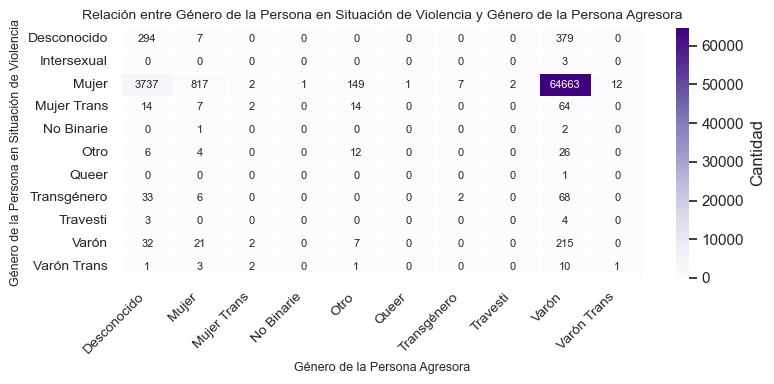

In [58]:
# Seleccionar columnas relacionadas con el género de la víctima y el agresor
genero_victima_cols = [col for col in df_144.columns if col.startswith('genero_persona_en_situacion_de_violencia_')]
genero_agresor_cols = [col for col in df_144.columns if col.startswith('genero_de_la_persona_agresora_')]

# Crear una tabla de contingencia vacía
tabla_contingencia = pd.DataFrame(index=genero_victima_cols, columns=genero_agresor_cols)

# Llenar la tabla de contingencia con los conteos
for victima in genero_victima_cols:
    for agresor in genero_agresor_cols:
        tabla_contingencia.at[victima, agresor] = df_144[(df_144[victima] == 1) & (df_144[agresor] == 1)].shape[0]

# Convertir los valores de la tabla de contingencia a enteros
tabla_contingencia = tabla_contingencia.astype(int)

# Eliminar el prefijo de las etiquetas de fila y columna para simplificar
tabla_contingencia.index = tabla_contingencia.index.str.replace('genero_persona_en_situacion_de_violencia_', '').str.replace('_', ' ').str.title()
tabla_contingencia.columns = tabla_contingencia.columns.str.replace('genero_de_la_persona_agresora_', '').str.replace('_', ' ').str.title()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 4))

# Crear el heatmap simplificado, eliminando estilos adicionales
sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap='Purples', 
            cbar_kws={'label': 'Cantidad'}, 
            linewidths=.5, linecolor='white', annot_kws={"size": 8})

# Ajustar los tamaños de las etiquetas
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)

# Títulos y etiquetas
plt.title('Relación entre Género de la Persona en Situación de Violencia y Género de la Persona Agresora', 
          fontsize=10)
plt.xlabel('Género de la Persona Agresora', fontsize=9)
plt.ylabel('Género de la Persona en Situación de Violencia', fontsize=9)

# Ajustar el diseño para evitar el solapamiento de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Conclusiones**

**Alta Frecuencia de Casos:** 64.663 casos reportados donde la víctima de violencia fue una mujer y el agresor fue un varón.

**Patrón Significativo:** La magnitud de este valor, siendo el más alto y más resaltado en el mapa de calor, sugiere que esta combinación específica (mujer como víctima y varón como agresor) es la más común y significativo. 

**Prevalencia del Género:** Este resultado puede reflejar una tendencia en los datos sobre violencia, indicando que los casos donde los varones son agresores y las mujeres son víctimas son los más reportados.

En el contexto del presente estudio, este hallazgo no es sorprendente, ya que las mujeres suelen ser las víctimas más frecuentes y los varones los agresores más comunes en muchos estudios sobre violencia de género.

* **Otro hallazgo significativo** El segpundo tipo de género más frecuente donde el género del agresor es desconocido

### **¿Cuáles son las edades más afectadas en la violencia doméstica?**

* **Objetivo:** Identificar los rangos de edad que son más afectados en los reportes de casos de violencia doméstica.

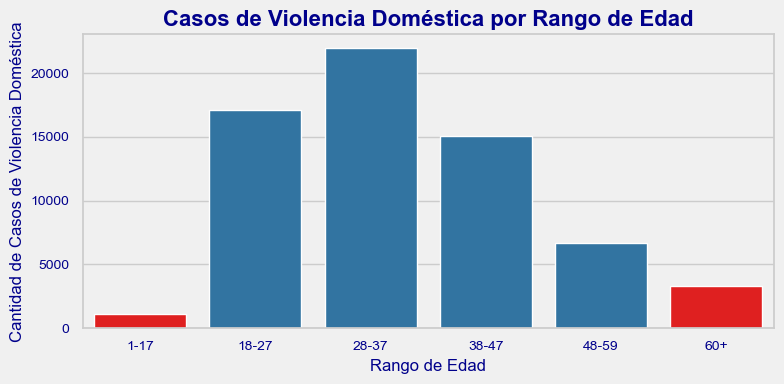

In [59]:
# Crear rangos de edad
bins = [0, 18, 28, 38, 48, 60, 110]
labels = ['1-17', '18-27', '28-37', '38-47', '48-59', '60+']
df_144['rango_edad'] = pd.cut(df_144['edad_persona_en_situacion_de_violencia'], bins=bins, labels=labels, right=False)

# Contar casos de violencia doméstica en cada rango de edad
violencia_por_edad = df_144[df_144['tipo_de_violencia_domestica'] == 1]['rango_edad'].value_counts().sort_index()

# Crear un DataFrame con los resultados para facilitar la visualización
df_vp_edad = violencia_por_edad.reset_index()
df_vp_edad.columns = ['Rango de Edad', 'Cantidad de Casos de Violencia Doméstica']

# Definir los colores personalizados para los rangos de edad
colors = ['red' if (label == '1-17' or label == '60+') else '#1f77b4' for label in labels]

# Establecer estilo y colores
sns.set(style="whitegrid")
title_and_label_color = "#00008B"  # Azul oscuro
background_color = "#f0f0f0"  # Gris claro

# Crear la figura y los ejes
plt.figure(figsize=(8, 4))

# Crear gráfico de barras con la paleta personalizada
sns.barplot(data=df_vp_edad, x='Rango de Edad', y='Cantidad de Casos de Violencia Doméstica', palette=colors, hue='Rango de Edad', dodge=False)

# Personalizar etiquetas y título
plt.title('Casos de Violencia Doméstica por Rango de Edad', fontsize=16, color=title_and_label_color, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12, color=title_and_label_color)
plt.ylabel('Cantidad de Casos de Violencia Doméstica', fontsize=12, color=title_and_label_color)
plt.xticks(fontsize=10, color=title_and_label_color)
plt.yticks(fontsize=10, color=title_and_label_color)

# Quitar la leyenda ya que los colores son explícitos
plt.legend([],[], frameon=False)

# Configurar el color de fondo
plt.gca().set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)

# Ajustar el diseño para evitar el solapamiento de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* **Conclusión**

* 28 a 37 años es el rango de edad del que máyor reporte de casos de violencia doméstica se presentan

* 18 a 27 años es el segundo rango en el que más se presentan casos de violencia doméstica, seguido de 38 a 47 con menor prevalencia

* **Un dato significativo, aunque en menor proporción, son los casos de violencia doméstica de menores de 17 años y adultos mayores de 60 años**

### **¿Cuáles son los tipos de violencia que más afectan a los menores de 17 y mayores de 60 años?**

* **Objetivo:** Identificar cuál es el tipo de violencia que más afecta a los grupos etarios más vulnerables.

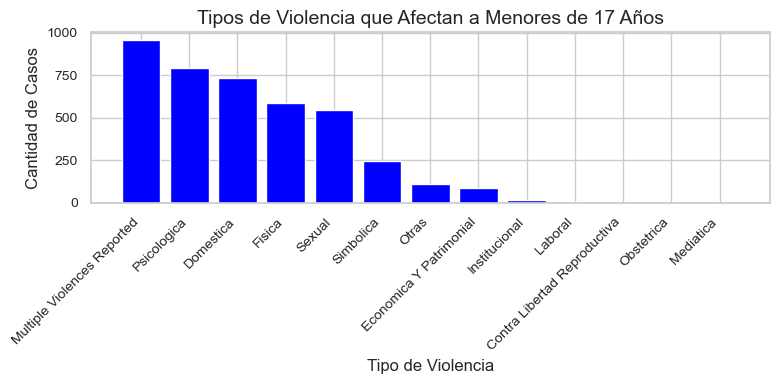

In [60]:
# Crear el filtro para menores de 17 años
menores_17 = df_144[df_144['edad_persona_en_situacion_de_violencia'] < 17]

# Listado de las columnas que representan los tipos de violencia
tipos_violencia = [
    'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral', 
    'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica', 
    'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras', 'multiple_violences_reported'
]

# Contar los tipos de violencia para el grupo de menores de 17 años
violencia_menores_17 = menores_17[tipos_violencia].sum().sort_values(ascending=False)

# Crear DataFrame para facilitar la visualización
df_violencia_menores_17 = violencia_menores_17.reset_index()
df_violencia_menores_17.columns = ['Tipo de Violencia', 'Cantidad de Casos']

# Eliminar prefijos de los nombres de las columnas
df_violencia_menores_17['Tipo de Violencia'] = df_violencia_menores_17['Tipo de Violencia'] \
    .str.replace('tipo_de_violencia_', '') \
    .str.replace('modalidad_de_violencia_', '') \
    .str.replace('modalidad_violencia_', '') \
    .str.replace('_', ' ') \
    .str.replace('Multiple Violences Reported', 'Violencia Múltiple') \
    .str.title()

# Crear la figura y los ejes
plt.figure(figsize=(8, 4))

# Crear gráfico de barras
plt.bar(x=df_violencia_menores_17['Tipo de Violencia'], 
        height=df_violencia_menores_17['Cantidad de Casos'], 
        color='blue')

# Personalizar etiquetas y título
plt.title('Tipos de Violencia que Afectan a Menores de 17 Años', fontsize=14)
plt.xlabel('Tipo de Violencia', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)

# Ajustar el diseño para evitar el solapamiento de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

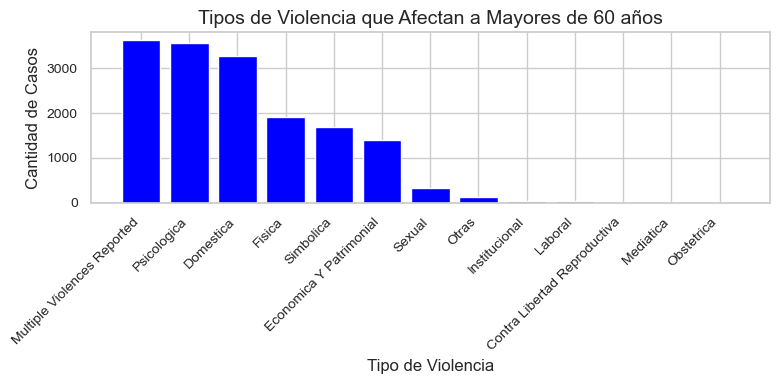

In [61]:
# Crear el filtro para menores de 17 años
mayores_60 = df_144[df_144['edad_persona_en_situacion_de_violencia'] > 59]

# Listado de las columnas que representan los tipos de violencia
tipos_violencia = [
    'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral', 
    'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica', 
    'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras', 'multiple_violences_reported'
]

# Contar los tipos de violencia para el grupo de mayores de 60 años
violencia_mayores_60 = mayores_60[tipos_violencia].sum().sort_values(ascending=False)

# Crear DataFrame para facilitar la visualización
df_violencia_mayores_60 = violencia_mayores_60.reset_index()
df_violencia_mayores_60.columns = ['Tipo de Violencia', 'Cantidad de Casos']

# Eliminar prefijos de los nombres de las columnas
df_violencia_mayores_60['Tipo de Violencia'] = df_violencia_mayores_60['Tipo de Violencia'] \
    .str.replace('tipo_de_violencia_', '') \
    .str.replace('modalidad_de_violencia_', '') \
    .str.replace('modalidad_violencia_', '') \
    .str.replace('_', ' ') \
    .str.replace('Multiple Violences Reported', 'Violencia Múltiple') \
    .str.title()

# Crear la figura y los ejes
plt.figure(figsize=(8, 4))

# Crear gráfico de barras
plt.bar(x=df_violencia_mayores_60['Tipo de Violencia'], 
        height=df_violencia_mayores_60['Cantidad de Casos'], 
        color='blue')

# Personalizar etiquetas y título
plt.title('Tipos de Violencia que Afectan a Mayores de 60 años', fontsize=14)
plt.xlabel('Tipo de Violencia', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)

# Ajustar el diseño para evitar el solapamiento de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Conclusión** 

En ambos grupos vulnerables los 4 primeros tipos de violencia que más les afectan son: 

1. **Violencia múltiple** 
2. Violencia psicológica 
3. Violencia doméstica 
4. Violencia física 

Sin embargo en el quinto lugar para los **menores de 17 años el tipo de violencia que más les afecta es la violencia sexual y en los mayores de 60 años la violencia simbólica, seguida de la violencia simbólica, y muy de cerca la violencia económica**

## **Tercera parte: Clasificación de la vulnerabilidad en casos de violencia mediante un algoritmo de clasificación**

En esta sección, se desarrollará un modelo de clasificación cuyo objetivo es priorizar los casos de violencia según su nivel de vulnerabilidad. Para ello, se utilizará un algoritmo de Random Forest, que será entrenado para clasificar los casos reportados en diferentes niveles de prioridad (Alta, Media, Baja) con base en las características de los casos, tales como la edad de la víctima, el vínculo con la persona agresora y la presencia de múltiples tipos de violencia. Este enfoque permitirá una intervención más rápida y efectiva, priorizando los casos de mayor riesgo.

### **¿Cómo se puede medir el índice de vulnerabilidad de los casos reportados?**

* **Objetivo:** Definir y documentar un índice de vulnerabilidad para los casos de violencia reportados, el cual servirá como una herramienta clave para facilitar la intervención de los profesionales involucrados y la toma de decisiones institucionales. Este índice será la base para un sistema de clasificación que permitirá priorizar la atención de los casos según su nivel de vulnerabilidad. 

Chambers define la vulnerabilidad como la exposición a contingencias y tensiones, y la incapacidad para afrontarlas. Esto incluye la falta de recursos, poder, educación y acceso a redes sociales, lo que aumenta el riesgo de sufrir daño.

_Fuente: Chambers, R. (1989). Vulnerability: How the Poor Cope. IDS Bulletin, 20(2), 1-7_

**Criterios seleccionados para calcular el _Índice de vulnerabilidad_ en reportes de violencia**

1. **Presencia de Violencia Múltiple:** La violencia múltiple indica una exposición a diferentes formas de abuso, lo que incrementa la vulnerabilidad de la víctima.y como se ha evidenciado en este estudio es un tipo de violencia prevalente en los casos reportados. 

2. **Edad de la Víctima:** La edad puede ser un factor importante en la vulnerabilidad, ya que los menores de edad y los adultos mayores pueden enfrentar riesgos específicos y diferentes como se ha evidenciado en el análisis y por la dificiltud que supone,para estos grupos etarios, acceder por sus propios medios a asistencia y ayuda externa. (La edad se selecciona como un factor de vulnerabilidad no como una condición discrimnante sino con caracter preventivo)

3. **Vínculo con la Persona Agresora** es Pareja, madre, padres o tutores: Estas condiciones indican un nivel más profundo de control y abuso, aumentando la vulnerabilidad de la víctima, además supone mayor cercanía con el abusador por convivencia cercana. 

Si bien, la sola condición de ser victima de violencia ya implica una condición de vulnerabilidad, estas 3 condiciones pueden provocar que la situación se agudize, se agrave o se repita de manera continua lo que socaba la integridad de la persona y provocar una mayor vulneración de los derechos de las víctimas. La selección de factores busca visibilizar **condiciones que agudizan la vulnerabilidad** de las mujeres víctimas de la violencia.

* **Construcción de la variable objetivo (Target):**

In [62]:
# Paso 1: Definir los factores y ponderaciones para el índice de vulnerabilidad
ponderacion_violencia_multiple = 40  # Presencia de violencia múltiple
ponderacion_edad = 30  # Edad de la víctima
ponderacion_vinculo = 30  # Vínculo con la persona agresora

# Paso 2: Calcular los puntajes individuales para cada factor

# 1. Puntaje por violencia múltiple (0 o 1, multiplicado por su ponderación)
df_144['puntaje_violencia_multiple'] = df_144['multiple_violences_reported'] * ponderacion_violencia_multiple

# 2. Puntaje por edad:
df_144['puntaje_edad'] = df_144['edad_persona_en_situacion_de_violencia'].apply(
    lambda x: ponderacion_edad if x < 18 or x > 60 else 0
)

# 3. Puntaje por vínculo con la persona agresora
vinculos_cercanos = ['vinculo_con_la_persona_agresora_Pareja', 
                     'vinculo_con_la_persona_agresora_Madre o tutor', 
                     'vinculo_con_la_persona_agresora_Padre o tutor']

# Asignar el puntaje por vínculo
df_144['puntaje_vinculo'] = df_144[vinculos_cercanos].max(axis=1) * ponderacion_vinculo

# Paso 3: Sumar los puntajes individuales para obtener el índice de vulnerabilidad
df_144['indice_vulnerabilidad'] = df_144['puntaje_violencia_multiple'] + df_144['puntaje_edad'] + df_144['puntaje_vinculo']

# Paso 4: Normalizar el índice a una escala de 0 a 100
df_144['indice_vulnerabilidad'] = df_144['indice_vulnerabilidad'].clip(0, 100)

# Mostrar las primeras filas para verificar
df_144[['multiple_violences_reported', 'edad_persona_en_situacion_de_violencia', 'puntaje_vinculo', 'indice_vulnerabilidad']].head()

,multiple_violences_reported,edad_persona_en_situacion_de_violencia,puntaje_vinculo,indice_vulnerabilidad
1,True,19.0,0,40
2,True,46.0,30,70
3,True,28.0,30,70
4,True,34.0,0,40
5,True,38.0,0,40


**Los resultados muestran que la lógica aplicada funciona de manera correcta en la ponderación del índice de vulnerabilidad**

* **Distribución del Índice de Vulnerabilidad:**

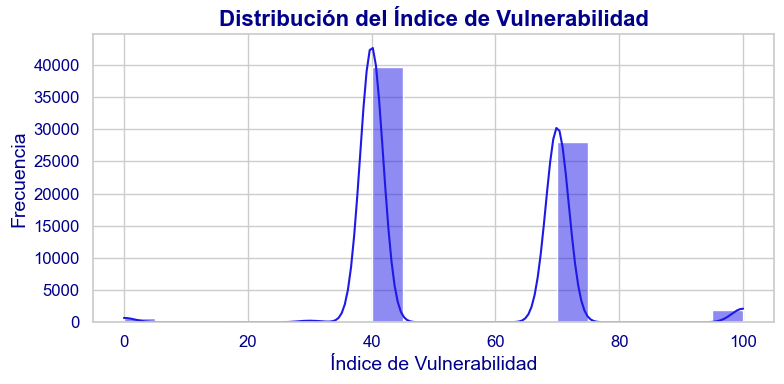

In [63]:
# Establecer el estilo y colores
sns.set(style="whitegrid")

# Crear un gráfico de barras para visualizar la distribución del índice de vulnerabilidad
plt.figure(figsize=(8, 4))
sns.histplot(df_144['indice_vulnerabilidad'], bins=20, kde=True, color="#1E19E6")

# Configurar etiquetas y título
plt.title('Distribución del Índice de Vulnerabilidad', fontsize=16, color="#00008B", fontweight='bold')
plt.xlabel('Índice de Vulnerabilidad', fontsize=14, color="#00008B")
plt.ylabel('Frecuencia', fontsize=14, color="#00008B")
plt.xticks(fontsize=12, color="#00008B")
plt.yticks(fontsize=12, color="#00008B")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Interpretación:**

La mayor parte de los casos se concentran en los valores de 40 y 70 en el índice de vulnerabilidad, lo que sugiere que la mayoría de las víctimas tienen un nivel de vulnerabilidad considerable. El gráfico es útil para entender cómo se distribuyen los niveles de vulnerabilidad entre las víctimas y podría ser un punto de partida para identificar subgrupos específicos que requieren intervenciones diferentes.

**Flexibilidad en la Interpretación del índice:**

El Índice de Vulnerabilidad se presenta como una escala numérica continua que va de 0 a 100, donde los puntajes más altos indican un mayor nivel de vulnerabilidad. Los umbrales pueden ser definidos por la institución que lo utilice y deben ser establecidos en colaboración con el equipo de profesionales encargados de los procesos de intervención, quienes conocen de cerca la realidad de los casos. La definición de estos límites queda abierta para que cada institución ajuste los valores según sus propios criterios y necesidades.

Esto proporciona la flexibilidad necesaria para adaptar el índice a distintos contextos. El algoritmo no pretende imponer un enfoque único, sino ofrecer una herramienta que facilite la toma de decisiones y promueva intervenciones oportunas y efectivas.

**La principal función del índice es facilitar la toma de decisiones y promover intervenciones oportunas. En casos de violencia, la rapidez y la adecuación de la respuesta son críticas para la protección de las víctimas. Un índice que ayuda a priorizar los casos más urgentes puede ser un recurso valioso para mejorar la eficacia de las intervenciones, permitiendo una respuesta más humana y adecuada.**

* **Relación entre Edad y el Índice de Vulnerabilidad:**

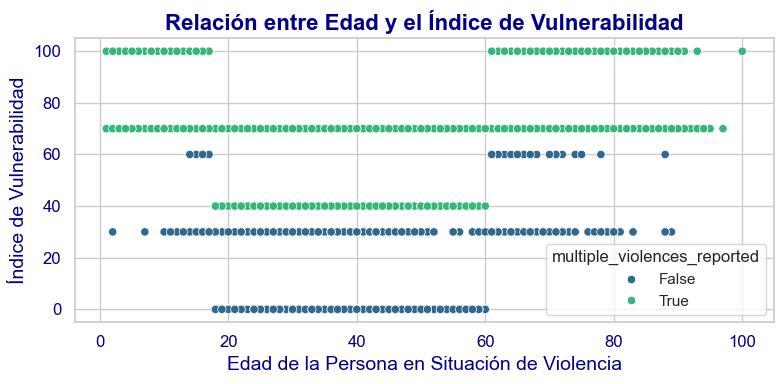

In [64]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_144, x='edad_persona_en_situacion_de_violencia', y='indice_vulnerabilidad', hue='multiple_violences_reported', palette='viridis')

# Configurar etiquetas y título
plt.title('Relación entre Edad y el Índice de Vulnerabilidad', fontsize=16, color="#00008B", fontweight='bold')
plt.xlabel('Edad de la Persona en Situación de Violencia', fontsize=14, color="#00008B")
plt.ylabel('Índice de Vulnerabilidad', fontsize=14, color="#00008B")
plt.xticks(fontsize=12, color="#00008B")
plt.yticks(fontsize=12, color="#00008B")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Interpretación:**

Este gráfico es útil para visualizar cómo la edad y la presencia de múltiples violencias afectan el índice de vulnerabilidad, y podría ser valioso para identificar grupos de alto riesgo que necesiten intervenciones más intensivas.

### **Entrenamiento del modelo**

### Justificación del modelo elegido: **Random Forest**

A continuación se presentan las razones clave por las que se ha seleccionado Random Forest para este proyecto:

* **Capacidad para manejar interacciones complejas:** Este modelo puede capturar interacciones no lineales y complejas entre las variables, lo cual es esencial cuando se consideran múltiples factores, que interactúan de manera no trivial para influir en el índice de vulnerabilidad. Es ideal cuando las relaciones entre las variables y el objetivo no son directas ni lineales, permitiendo que el modelo capture y explote estas interacciones complejas para mejorar la precisión de las predicciones.

* **Interpretabilidad:** Una de las ventajas significativas de Random Forest es su capacidad para proporcionar medidas de importancia de las variables. Esto permite interpretar cuáles factores contribuyen más al índice de vulnerabilidad, lo cual es esencial para la transparencia y la confianza en la toma de decisiones.

* **Escalabilidad:** Random Forest es eficiente al manejar grandes volúmenes de datos, lo cual es necesario para analizar los datos históricos.

* **Optimización premodelado:**

In [65]:
# Definir los umbrales para las categorías de prioridad
def categorizar_prioridad(indice):
    if indice >= 70:
        return 'Alta'
    elif 40 <= indice < 70:
        return 'Media'
    else:
        return 'Baja'

# Crear una nueva columna en el DataFrame para las categorías de prioridad
df_144['prioridad'] = df_144['indice_vulnerabilidad'].apply(categorizar_prioridad)

In [66]:
print(df_144[['indice_vulnerabilidad', 'prioridad']].head(20))

    indice_vulnerabilidad prioridad
1                      40     Media
2                      70      Alta
3                      70      Alta
4                      40     Media
5                      40     Media
6                      70      Alta
8                      40     Media
9                      70      Alta
11                     70      Alta
12                     70      Alta
13                     70      Alta
14                     70      Alta
15                     70      Alta
16                     40     Media
17                     40     Media
18                      0      Baja
19                     70      Alta
20                     40     Media
21                     40     Media
22                     70      Alta


In [67]:
# Contar cuántos registros hay en cada categoría de prioridad
print(df_144['prioridad'].value_counts())

# Verificar si hay valores nulos en la columna de prioridad
print(df_144['prioridad'].isnull().sum())

prioridad
Media    39763
Alta     30030
Baja       845
Name: count, dtype: int64
0


In [68]:
# Identificar las columnas que no son numéricas
columnas_no_numericas = df_144.select_dtypes(exclude=['number']).columns

# Mostrar las columnas no numéricas
print("Columnas no numéricas en el DataFrame:")
print(columnas_no_numericas)

# Mostrar los primeros registros de estas columnas para revisar sus valores
print(df_144[columnas_no_numericas].head())

Columnas no numéricas en el DataFrame:
Index(['multiple_violences_reported', 'provincia', 'rango_edad', 'prioridad'], dtype='object')
   multiple_violences_reported                      provincia rango_edad  \
1                         True     prov_filtrado_Buenos Aires      18-27   
2                         True     prov_filtrado_Buenos Aires      38-47   
3                         True  prov_filtrado_menos_frecuente      28-37   
4                         True          prov_filtrado_Mendoza      28-37   
5                         True     prov_filtrado_Buenos Aires      38-47   

  prioridad  
1     Media  
2      Alta  
3      Alta  
4     Media  
5     Media  


In [69]:
# Aplicar One-Hot Encoding a las columnas no numéricas, incluyendo 'prioridad'
df_144 = pd.get_dummies(df_144, columns=['prioridad', 'provincia', 'rango_edad', 'multiple_violences_reported'], drop_first=False)

# Verificar que todas las columnas ahora sean numéricas
print(df_144.dtypes)

año                                         int64
edad_persona_en_situacion_de_violencia    float64
tipo_de_violencia_fisica                    int32
tipo_de_violencia_psicologica               int32
tipo_de_violencia_sexual                    int32
                                           ...   
rango_edad_38-47                             bool
rango_edad_48-59                             bool
rango_edad_60+                               bool
multiple_violences_reported_False            bool
multiple_violences_reported_True             bool
Length: 95, dtype: object


In [70]:
# Convertir todas las columnas booleanas a enteros
df_144 = df_144.astype({col: 'int' for col in df_144.select_dtypes(include='bool').columns})

# Verificar nuevamente los tipos de datos
print(df_144.dtypes)

año                                         int64
edad_persona_en_situacion_de_violencia    float64
tipo_de_violencia_fisica                    int32
tipo_de_violencia_psicologica               int32
tipo_de_violencia_sexual                    int32
                                           ...   
rango_edad_38-47                            int32
rango_edad_48-59                            int32
rango_edad_60+                              int32
multiple_violences_reported_False           int32
multiple_violences_reported_True            int32
Length: 95, dtype: object


In [71]:
# Verificar las columnas relacionadas con 'prioridad'
columnas_prioridad = [col for col in df_144.columns if 'prioridad' in col]
print("Columnas relacionadas con 'prioridad':")
print(columnas_prioridad)

# Mostrar las primeras filas de estas columnas para verificar la codificación
print(df_144[columnas_prioridad].head())

Columnas relacionadas con 'prioridad':
['prioridad_Alta', 'prioridad_Baja', 'prioridad_Media']
   prioridad_Alta  prioridad_Baja  prioridad_Media
1               0               0                1
2               1               0                0
3               1               0                0
4               0               0                1
5               0               0                1


* **Entrenamiento y evaluación del modelo:**

In [72]:
# Definir las características (X) y la variable objetivo (y)
X = df_144.drop(columns=['prioridad_Alta', 'prioridad_Baja', 'prioridad_Media'])  # Eliminar las columnas de prioridad
y = df_144['prioridad_Alta']  # Usar la columna `prioridad_Alta` como objetivo


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Estandarización de los datos
    ('classifier', RandomForestClassifier(random_state=42))  # Modelo Random Forest
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12183
           1       1.00      1.00      1.00      9009

    accuracy                           1.00     21192
   macro avg       1.00      1.00      1.00     21192
weighted avg       1.00      1.00      1.00     21192

Matriz de confusión:
[[12183     0]
 [    0  9009]]


**Interpretación de los Resultados:**

Precision, Recall, F1-Score:

* Precision: El modelo fue capaz de identificar correctamente todos los casos positivos (prioridad "Alta") y negativos (prioridad "No Alta").

* Recall: El modelo también recuperó todos los casos positivos y negativos sin omitir ninguno.
* F1-Score: La media armónica de precision y recall es perfecta, lo que indica un equilibrio óptimo entre ambos.

* Matriz de Confusión: Indica que el modelo predijo correctamente los 12,183 casos de "No Alta" y los 9,009 casos de "Alta" sin cometer errores.

* **Optimización con hiperparámetros:**

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el pipeline sin entrenar
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('classifier', RandomForestClassifier(random_state=42))  # Modelo Random Forest
])

# Definir la distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'classifier__n_estimators': randint(100, 500),          # Número de árboles en el bosque
    'classifier__max_depth': [10, 20, 30, None],            # Profundidad máxima de los árboles
    'classifier__min_samples_split': randint(2, 11),        # Número mínimo de muestras para dividir un nodo
    'classifier__min_samples_leaf': randint(1, 5),          # Número mínimo de muestras por hoja
    'classifier__bootstrap': [True, False]                  # Método de bootstrap
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Entrenar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:")
print(random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros:
{'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 288}


* **Validación cruzada con los mejores hiperparámetros**

In [75]:
from sklearn.model_selection import cross_val_score

# Usar los mejores hiperparámetros encontrados
best_pipeline = random_search.best_estimator_

# Realizar validación cruzada
cv_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Mostrar los resultados de la validación cruzada
print("Puntuaciones de validación cruzada:")
print(cv_scores)

print("Precisión media en validación cruzada: {:.4f}".format(cv_scores.mean()))

Puntuaciones de validación cruzada:
[1. 1. 1. 1. 1.]
Precisión media en validación cruzada: 1.0000


In [76]:
# Evaluar el modelo en el conjunto de prueba
y_test_pred = best_pipeline.predict(X_test)

print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))

print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_test_pred))

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12183
           1       1.00      1.00      1.00      9009

    accuracy                           1.00     21192
   macro avg       1.00      1.00      1.00     21192
weighted avg       1.00      1.00      1.00     21192

Matriz de confusión en el conjunto de prueba:
[[12183     0]
 [    0  9009]]


In [77]:
# Verificar las clases que reconoce el modelo
print("Clases reconocidas por el modelo:", best_pipeline.named_steps['classifier'].classes_)
print("Cantidad de clases reconocidas por el modelo:", len(best_pipeline.named_steps['classifier'].classes_))

Clases reconocidas por el modelo: [0 1]
Cantidad de clases reconocidas por el modelo: 2


* **Visualización de la importancia de las características**

                               Característica  Importancia
72                      indice_vulnerabilidad     0.331160
71                            puntaje_vinculo     0.219837
65     vinculo_con_la_persona_agresora_Pareja     0.217292
60  vinculo_con_la_persona_agresora_Ex pareja     0.122500
70                               puntaje_edad     0.025784
1      edad_persona_en_situacion_de_violencia     0.021201
89                             rango_edad_60+     0.013133
84                            rango_edad_1-17     0.008920
62       vinculo_con_la_persona_agresora_Otro     0.008511
7                 tipo_de_violencia_domestica     0.005435


<Figure size 1000x800 with 0 Axes>

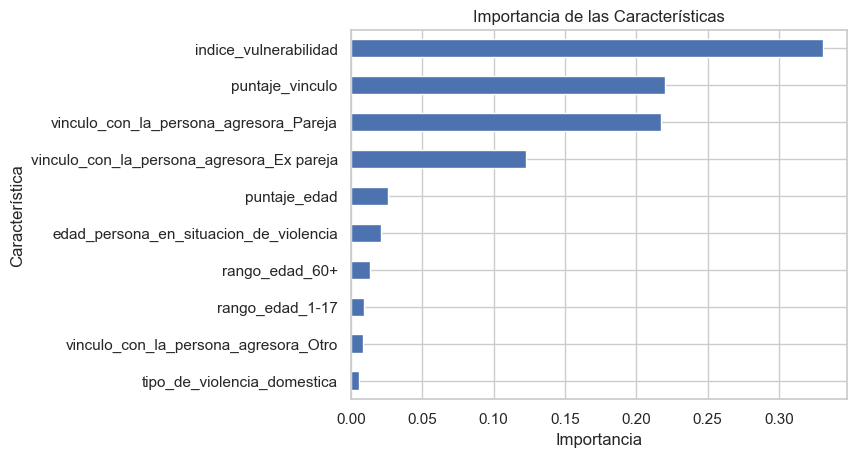

In [78]:
# Obtener la importancia de las características del modelo optimizado
importancias = best_pipeline.named_steps['classifier'].feature_importances_
caracteristicas = X_test.columns
importancia_df = pd.DataFrame({'Característica': caracteristicas, 'Importancia': importancias})

# Ordenar las características por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 características más importantes
print(importancia_df.head(10))

# Visualización de las 10 características más importantes
plt.figure(figsize=(10, 8))
importancia_df.head(10).plot(kind='barh', x='Característica', y='Importancia', legend=False)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante aparezca en la parte superior
plt.show()

**Análisis del Resultado:**

* indice_vulnerabilidad: Esta característica parece ser la más influyente en el modelo, lo cual es coherente si el índice de vulnerabilidad está directamente relacionado con el resultado que estás tratando de predecir.

* puntaje_vinculo y vinculo_con_la_persona_agresora: Las relaciones de la persona en situación de violencia con el agresor (pareja, ex pareja, etc.) también son altamente significativas, lo que tiene sentido dado que el vínculo suele ser un factor crucial en situaciones de violencia.

* edad_persona_en_situacion_de_violencia y rango_edad: La edad de la persona afectada también es una variable importante, lo que sugiere que ciertos grupos etarios podrían ser más vulnerables o estar en situaciones de mayor riesgo.

* **Visualización de la matriz de confusión**

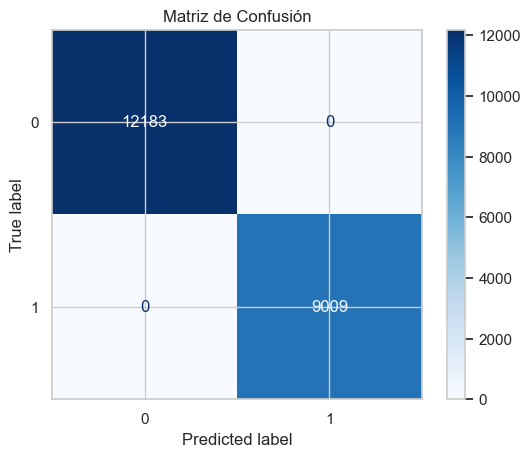

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar las predicciones en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.named_steps['classifier'].classes_)
disp.plot(cmap=plt.cm.Blues)

# Añadir título y mostrar
plt.title("Matriz de Confusión")
plt.show()

El modelo está prediciendo perfectamente tanto la clase 0 como la clase 1 en el conjunto de prueba, lo cual se refleja en la ausencia de falsos positivos y falsos negativos.

## **Cuarta parte: Conclusiones y recomendaciones**

* **Clasificación del Índice de Vulnerabilidad (CIV):** El modelo desarrollado para clasificar el Índice de Vulnerabilidad se ha diseñado para identificar y priorizar a las personas que se encuentran en situaciones de mayor riesgo, asegurando que reciban la atención y los recursos necesarios de manera oportuna. Este enfoque busca promover la equidad en la atención a las víctimas, asegurando que los esfuerzos se concentren en quienes más lo necesitan, en lugar de aplicar una estrategia uniforme que podría no responder adecuadamente a las necesidades de las personas en situaciones más críticas.

* **Monitoreo y Evaluación Continua:** Aunque el enfoque del CIV está alineado con la equidad y la protección de los más vulnerables, es crucial que el modelo sea monitoreado y evaluado de manera continua si se implementa en la práctica. Este monitoreo es esencial para garantizar que el modelo siga cumpliendo sus objetivos sociales a largo plazo, evitando la perpetuación de dinámicas discriminatorias o la creación de efectos no deseados que puedan surgir con el tiempo.

* **Impacto de Factores Críticos:** El análisis sugiere que factores como el tipo de vínculo con el agresor, la edad de la víctima y la presencia de múltiples formas de violencia tienen un impacto significativo en la clasificación de la vulnerabilidad. Sin embargo, este estudio no incluye un seguimiento a largo plazo sobre cómo estas clasificaciones afectan el acceso a recursos o la protección efectiva de las víctimas. Futuros estudios podrían explorar este aspecto crítico para diseñar intervenciones más efectivas y dirigidas, con el objetivo de mejorar la calidad de vida y reducir el riesgo de revictimización.

* **Evaluación Continua del Modelo:** Se recomienda continuar la investigación para evaluar si la clasificación del índice de vulnerabilidad efectivamente contribuye a una respuesta más rápida y eficaz en casos de violencia. Un seguimiento continuo permitiría ajustar y perfeccionar las políticas y estrategias de intervención, maximizando su impacto en la protección y bienestar de las víctimas.

* **Aplicación del Modelo en Otros Contextos:** El CIV puede establecerse como un modelo base para la clasificación y priorización en otros contextos de violencia o riesgo social. A futuro, este modelo podría evolucionar hacia una herramienta más sofisticada, integrando variables adicionales y datos más amplios, lo que permitiría una evaluación más completa y precisa de la vulnerabilidad en diversos escenarios sociales.